### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMClassifier

In [2]:
# Load dataset 
df = joblib.load('ricci_boltztrap_mp_tabular_merged_with_NaN_v2.pkl')

# Define features and target variable
features = joblib.load('features_is_metal.pkl')
print('No. of features', len(features))

df

No. of features 2496


minimum_oxidation_state  maximum_oxidation_state  \
mp-623511                      0.0                      0.0   
mp-1992                        0.0                      0.0   
mp-27502                       0.0                      0.0   
mp-770629                      0.0                      0.0   
mp-27202                       0.0                      0.0   
...                            ...                      ...   
mp-565480                      0.0                      0.0   
mp-773740                      0.0                      0.0   
mp-25604                       0.0                      0.0   
mp-764227                      0.0                      0.0   
mp-770057                      0.0                      0.0   

           range_oxidation_state  std_dev_oxidation_state  compound_possible  \
mp-623511                    0.0                      0.0                  1   
mp-1992                      0.0                      0.0                  0   
mp-27502                     0.0                      0.0                  1   
mp-770629                    0.0                      0.0                  1   
mp-27202                     0.0                      0.0                  0   
...                          ...                      ...                ...   
mp-565480                    0.0                      0.0                  1   
mp-773740                    0.0                      0.0                  1   
mp-25604                     0.0                      0.0                  0   
mp-764227                    0.0                      0.0                  1   
mp-770057                    0.0                      0.0                  1   

           max_ionic_char  avg_ionic_char  avg_anion_electron_affinity  \
mp-623511        0.000000        0.000000                          0.0   
mp-1992          0.190712        0.044698                          0.0   
mp-27502         0.088829        0.016742                          0.0   
mp-770629        0.779730        0.171021                          0.0   
mp-27202         0.070306        0.004246                          0.0   
...                   ...             ...                          ...   
mp-565480        0.820234        0.136348                          0.0   
mp-773740        0.685139        0.140569                          0.0   
mp-25604         0.443019        0.085693                          0.0   
mp-764227        0.774266        0.185501                          0.0   
mp-770057        0.779730        0.112383                          0.0   

           minimum_EN_difference  maximum_EN_difference  ...  κₑᵉ.n.T [K]  \
mp-623511                    0.0                    0.0  ...        100.0   
mp-1992                      0.0                    0.0  ...        100.0   
mp-27502                     0.0                    0.0  ...        100.0   
mp-770629                    0.0                    0.0  ...        100.0   
mp-27202                     0.0                    0.0  ...        600.0   
...                          ...                    ...  ...          ...   
mp-565480                    0.0                    0.0  ...        200.0   
mp-773740                    0.0                    0.0  ...        100.0   
mp-25604                     0.0                    0.0  ...        100.0   
mp-764227                    0.0                    0.0  ...        100.0   
mp-770057                    0.0                    0.0  ...        300.0   

           κₑᵉ.n.c [cm⁻³]  mₑᶜ.p.ε̄ [mₑ]  mₑᶜ.p.ε₁ [mₑ]  mₑᶜ.p.ε₂ [mₑ]  \
mp-623511    1.000000e+16            NaN            NaN            NaN   
mp-1992      1.000000e+16            NaN            NaN            NaN   
mp-27502     1.000000e+16       9.948649       3.481600       5.835956   
mp-770629    1.000000e+16      10.016446       7.157813       8.633919   
mp-27202     1.000000e+16      25.742400      17.822069      20.141565   
...                   ...          

In [3]:
df['is_metal']

mp-623511    Yes
mp-1992      Yes
mp-27502      No
mp-770629     No
mp-27202      No
            ... 
mp-565480     No
mp-773740     No
mp-25604     Yes
mp-764227     No
mp-770057     No
Name: is_metal, Length: 47737, dtype: object

In [4]:
df.replace({'Yes': 0, 'No': 1}, inplace=True)

In [5]:
df['is_metal']

mp-623511    0
mp-1992      0
mp-27502     1
mp-770629    1
mp-27202     1
            ..
mp-565480    1
mp-773740    1
mp-25604     0
mp-764227    1
mp-770057    1
Name: is_metal, Length: 47737, dtype: int64

In [6]:
target = 'is_metal'
print(target)

is_metal


In [7]:
df.groupby(target).count()

minimum_oxidation_state  maximum_oxidation_state  \
is_metal                                                     
0                           17270                    17270   
1                           30467                    30467   

          range_oxidation_state  std_dev_oxidation_state  compound_possible  \
is_metal                                                                      
0                         17270                    17270              17270   
1                         30467                    30467              30467   

          max_ionic_char  avg_ionic_char  avg_anion_electron_affinity  \
is_metal                                                                
0                  17270           17270                        17270   
1                  30467           30467                        30467   

          minimum_EN_difference  maximum_EN_difference  ...  κₑᵉ.n.T [K]  \
is_metal                                                ...                
0                         17270                  17270  ...        17270   
1                         30467                  30467  ...        30467   

          κₑᵉ.n.c [cm⁻³]  mₑᶜ.p.ε̄ [mₑ]  mₑᶜ.p.ε₁ [mₑ]  mₑᶜ.p.ε₂ [mₑ]  \
is_metal                                                                
0                  17270           3282           3282           3282   
1                  30467          28373          28373          28373   

          mₑᶜ.p.ε₃ [mₑ]  mₑᶜ.n.ε̄ [mₑ]  mₑᶜ.n.ε₁ [mₑ]  mₑᶜ.n.ε₂ [mₑ]  \
is_metal                                                               
0                  3282           3282           3282           3282   
1                 28373          28373          28373          28373   

          mₑᶜ.n.ε₃ [mₑ]  
is_metal                 
0                  3282  
1                 28373  

[2 rows x 2539 columns]

### Split & Scale Features

In [6]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\6. ricci_boltztrap_mp_tabular (done)


In [7]:
# Split dataset
df_train, df_test = train_test_split(
                                    df, 
                                    test_size=0.2, 
                                    stratify=df[target].tolist(), 
                                    random_state=42
                                    ) 

In [8]:
# Save unscaled data
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '.pkl')
joblib.dump(df_test, target + '_results/' + 'df_test_' + str(target) + '.pkl')

['is_metal_results/df_test_is_metal.pkl']

In [9]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

# Create pandas.Dataframe of scaled test set using scaler as defined using training set                           
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [10]:
# Save 
joblib.dump(df_train, target + '_results/' + 'df_train_' + str(target) + '_scaled.pkl')
joblib.dump(df_test, target + '_results/' +  'df_test_' + str(target) + '_scaled.pkl')

['is_metal_results/df_test_is_metal_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_is_metal.pkl'

problem = 'classification'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = True, 
            problem = problem,
            target_classes=2
            )

Name of target column:  is_metal
No. of exploratory features:  2496


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        objective='binary', 
        oversample_technique='smoothed_ros',
        cv_folds = 10
        )

Model employed:  lightGBM
Total no. of permutations: 8


   (1 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 20)]
   No. of rows in the training set: 30551

   Oversampling training data...
   No. of rows in training set after oversampling: 38996
   Metric score:  0.50000
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 30551

   Oversampling training data...
   No. of rows in training set after oversampling: 38996
   Metric score:  0.50000


   (3 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 20)]
   No. of rows in the training set: 30551

   Oversampling training data...
   No. of rows in training set after oversampling: 38996
   Metric score:  0.50000


   (4 of 8)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
 

LGBMClassifier(importance_type='gain', num_leaves=20, objective='binary')

Result saved as: feature_relevance_score_is_metal.pkl
Figure saved as: feature_relevance_plot_is_metal.png


feature  relevance_score
0     PymatgenData_maximum_coefficient_of_linear_the...     72556.612396
1             PymatgenData_minimum_thermal_conductivity     45387.516353
2                                max_packing_efficiency      8341.903227
3                             transition_metal_fraction      7966.444581
4                                                gap_AO      6305.289196
...                                                 ...              ...
2491                       jml_atom_rad_subs_voro_coord         0.000000
2492                            jml_first_ion_en_subs_X         0.000000
2493                                            jml_C34         0.000000
2494                                            jml_C32         0.000000
2495                        crystal_system_ohe_trigonal         0.000000

[2496 rows x 2 columns]

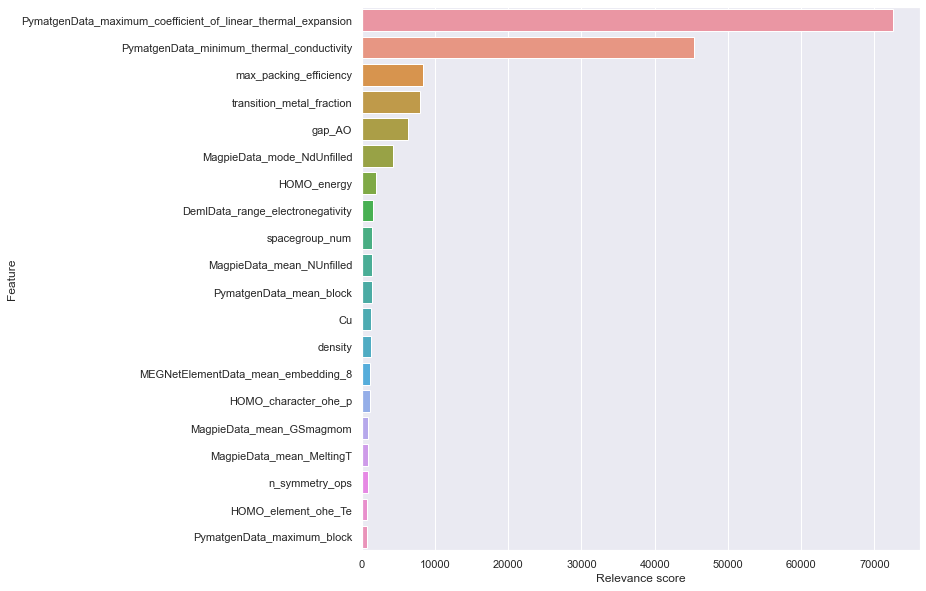

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = True, 
                    oversample_technique = 'smoothed_ros', 
                    chosen_metric = 'f1_score',
                    average = 'weighted',
                    no_to_terminate = 150,
                    max_no_imp = 10
                    )

   No. of rows in training set:  30551
No. of features considering:  1

n=1: train_acc=0.7722, validation_acc=0.7727 

n=1: train_b_acc=0.6882, validation_b_acc=0.6885 

n=1: train_hl=0.2278 validation_hl=0.2273 

n=1: train_f1=0.7398, validation_f1=0.7402 

n=1: train_roc_auc=0.6893, validation_roc_auc=0.6896 

n=1: train_avg_precision)=0.7397, validation_avg_precision)=0.7399 

--- 0.18616819381713867 seconds --- 

No. of features considering:  2

n=2: train_acc=0.7889, validation_acc=0.7814 

n=2: train_b_acc=0.7215, validation_b_acc=0.7117 

n=2: train_hl=0.2111 validation_hl=0.2186 

n=2: train_f1=0.7695, validation_f1=0.7602 

n=2: train_roc_auc=0.7652, validation_roc_auc=0.7391 

n=2: train_avg_precision)=0.7974, validation_avg_precision)=0.7757 

--- 0.17816162109375 seconds --- 

No. of features considering:  3

n=3: train_acc=0.8071, validation_acc=0.7935 

n=3: train_b_acc=0.7403, validation_b_acc=0.7235 

n=3: train_hl=0.1929 validation_hl=0.2065 

n=3: train_f1=0.7889, val

train_acc  validation_acc  train_b_acc  validation_b_acc  \
no_of_features                                                             
1                0.772184        0.772715     0.688249          0.688514   
2                0.788910        0.781356     0.721475          0.711669   
3                0.807109        0.793532     0.740337          0.723481   
4                0.832608        0.801257     0.787763          0.737215   
5                0.837518        0.814087     0.796626          0.760516   
...                   ...             ...          ...               ...   
145              0.906713        0.877324     0.884712          0.851684   
146              0.906648        0.880335     0.884426          0.861412   
147              0.906779        0.879288     0.884587          0.856280   
148              0.906484        0.877586     0.884670          0.853692   
149              0.907794        0.877848     0.886440          0.854289   

                train_hamming  validation_hamming  train_avg_precision  \
no_of_features                                                           
1                    0.227816            0.227285             0.739670   
2                    0.211090            0.218644             0.797442   
3                    0.192891            0.206468             0.883776   
4                    0.167392            0.198743             0.916351   
5                    0.162482            0.185913             0.936499   
...                       ...                 ...                  ...   
145                  0.093287            0.122676             0.978639   
146                  0.093352            0.119665             0.978389   
147                  0.093221            0.120712             0.978677   
148                  0.093516            0.122414             0.978861   
149                  0.092206            0.122152             0.978742   

                validation_avg_precision  train_roc_auc  validation_roc_auc  \
no_of_features                                                                
1                               0.739915       0.689317            0.689595   
2                               0.775691       0.765223            0.739050   
3                               0.838495       0.846324            0.804122   
4                               0.887476       0.886970            0.853655   
5                               0.921182       0.905291            0.883300   
...                                  ...            ...                 ...   
145                             0.961792       0.966110            0.941057   
146                             0.961271       0.965711            0.941428   
147                             0.961702       0.965982            0.942001   
148                             0.962136       0.966282            0.941809   
149                             0.961449       0.966122            0.941335   

                train_f1  validation_f1  
no_of_features                           
1               0.739820       0.740184  
2               0.769459       0.760184  
3               0.788864       0.772690  
4               0.824909       0.784283  
5               0.831171       0.802640  
...                  ...            ...  
145             0.905101       0.874990  
146             0.905005       0.879116  
147             0.905141       0.877417  
148             0.904895       0.875561  
149             0.906273       0.875881  

[149 rows x 12 columns]

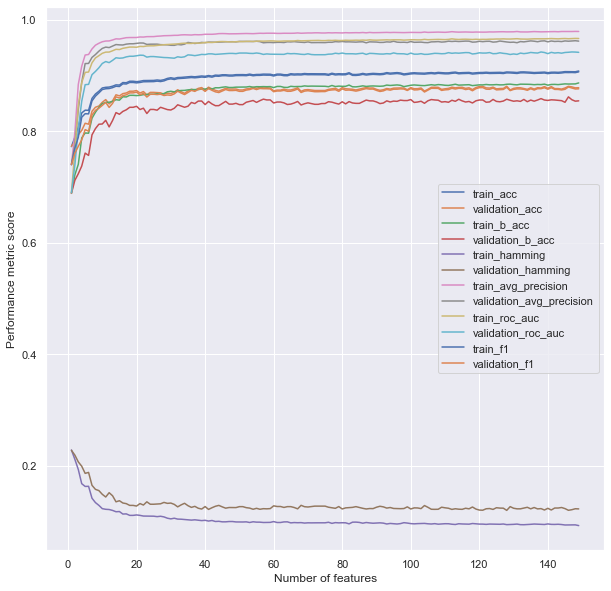

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [7]:
# Plot the result
FS.convergence_plot()

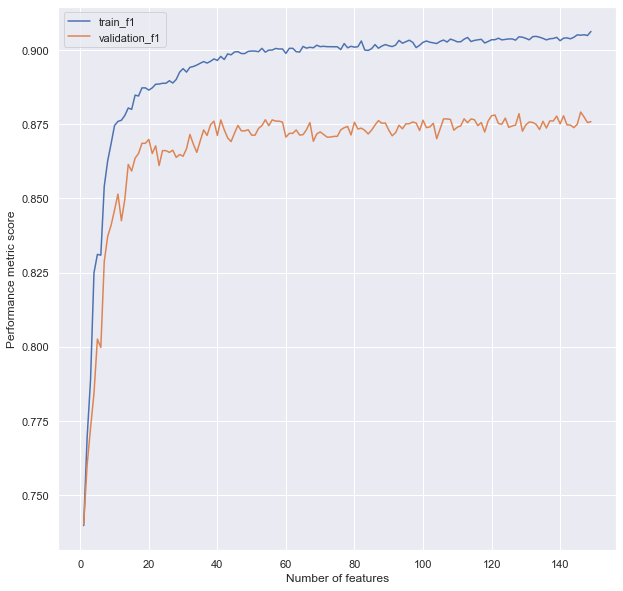

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_f1',
                    validation_metric = 'validation_f1'
                    )

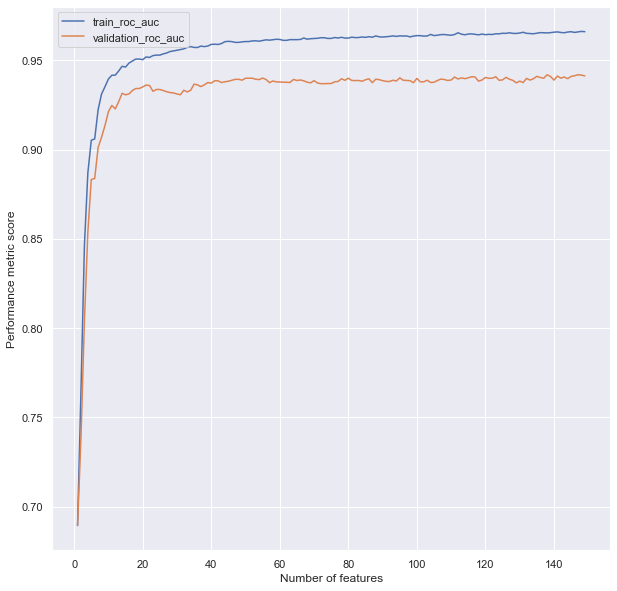

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_roc_auc',
                    validation_metric = 'validation_roc_auc'
                    )

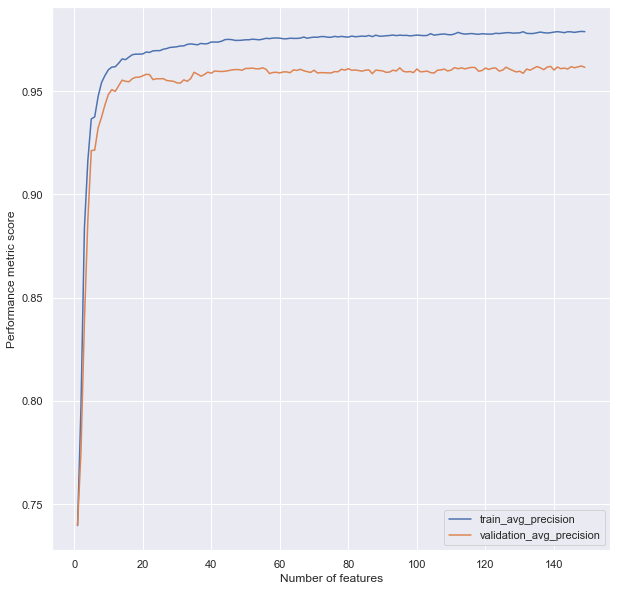

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_avg_precision',
                    validation_metric = 'validation_avg_precision'
                    )

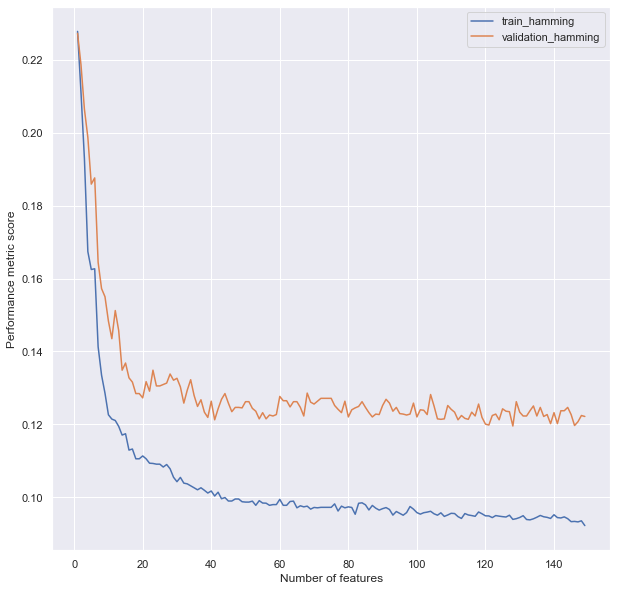

Result saved as: GBFS_convergence_plot_is_metal.png


<Figure size 720x720 with 0 Axes>

In [11]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_hamming',
                    validation_metric = 'validation_hamming'
                    )

<AxesSubplot:xlabel='no_of_features'>

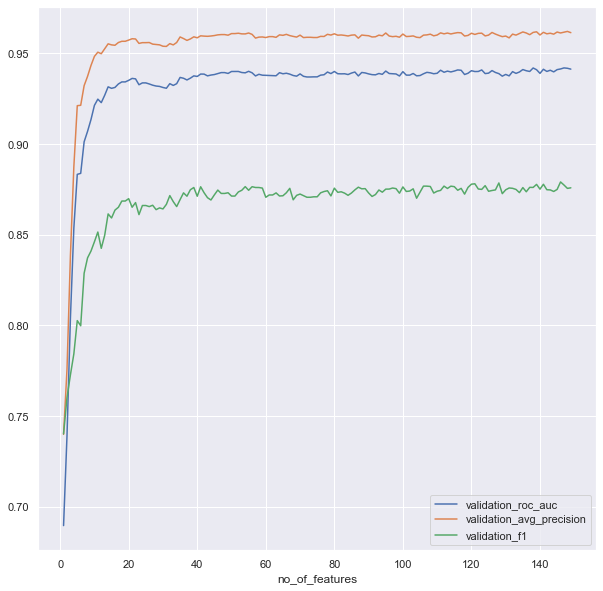

In [12]:
a = joblib.load(path_to_save + 'GBFS_result_is_metal.pkl')
a[['validation_roc_auc', 'validation_avg_precision', 'validation_f1']].plot()

#a['validation_hamming'].plot()

Get pretty graph

In [1]:
import joblib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_is_metal.pkl'

problem = 'classification'


df = joblib.load(path_to_save + 'GBFS_result_is_metal.pkl')
df

train_acc  validation_acc  train_b_acc  validation_b_acc  \
no_of_features                                                             
1                0.772184        0.772715     0.688249          0.688514   
2                0.788910        0.781356     0.721475          0.711669   
3                0.807109        0.793532     0.740337          0.723481   
4                0.832608        0.801257     0.787763          0.737215   
5                0.837518        0.814087     0.796626          0.760516   
...                   ...             ...          ...               ...   
145              0.906713        0.877324     0.884712          0.851684   
146              0.906648        0.880335     0.884426          0.861412   
147              0.906779        0.879288     0.884587          0.856280   
148              0.906484        0.877586     0.884670          0.853692   
149              0.907794        0.877848     0.886440          0.854289   

                train_hamming  validation_hamming  train_avg_precision  \
no_of_features                                                           
1                    0.227816            0.227285             0.739670   
2                    0.211090            0.218644             0.797442   
3                    0.192891            0.206468             0.883776   
4                    0.167392            0.198743             0.916351   
5                    0.162482            0.185913             0.936499   
...                       ...                 ...                  ...   
145                  0.093287            0.122676             0.978639   
146                  0.093352            0.119665             0.978389   
147                  0.093221            0.120712             0.978677   
148                  0.093516            0.122414             0.978861   
149                  0.092206            0.122152             0.978742   

                validation_avg_precision  train_roc_auc  validation_roc_auc  \
no_of_features                                                                
1                               0.739915       0.689317            0.689595   
2                               0.775691       0.765223            0.739050   
3                               0.838495       0.846324            0.804122   
4                               0.887476       0.886970            0.853655   
5                               0.921182       0.905291            0.883300   
...                                  ...            ...                 ...   
145                             0.961792       0.966110            0.941057   
146                             0.961271       0.965711            0.941428   
147                             0.961702       0.965982            0.942001   
148                             0.962136       0.966282            0.941809   
149                             0.961449       0.966122            0.941335   

                train_f1  validation_f1  
no_of_features                           
1               0.739820       0.740184  
2               0.769459       0.760184  
3               0.788864       0.772690  
4               0.824909       0.784283  
5               0.831171       0.802640  
...                  ...            ...  
145             0.905101       0.874990  
146             0.905005       0.879116  
147             0.905141       0.877417  
148             0.904895       0.875561  
149             0.906273       0.875881  

[149 rows x 12 columns]

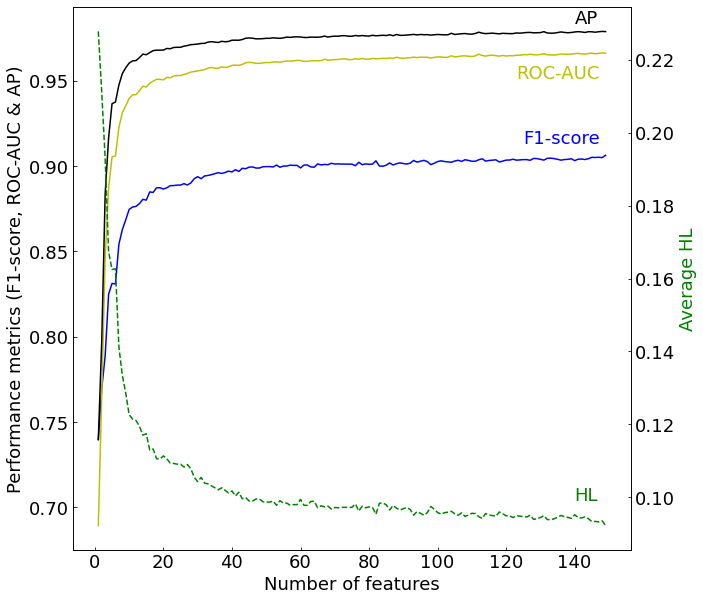

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 10)) #, dpi=300)

n = 180

ax2 = ax1.twinx()
ax1.plot(df['train_f1'][:n], 'b-')
ax1.plot(df['train_roc_auc'][:n], 'y-')
ax1.plot(df['train_avg_precision'][:n], 'k-')


ax2.plot(df['train_hamming'][:n], 'g--')

fontsize=18
ax1.set_xlabel('Number of features', fontsize=fontsize)
ax1.set_ylabel('Performance metrics (F1-score, ROC-AUC & AP)', fontsize=fontsize, color='k') 
ax2.set_ylabel('Average HL', fontsize=fontsize, color='g')

ax1.tick_params(labelsize=fontsize, direction='in')
ax2.tick_params(labelsize=fontsize, direction='in')

x=125
y=0.197
plt.text(x, y, 'F1-score', c='b', fontsize=fontsize)
plt.text(x-2, y + 0.018, 'ROC-AUC', c='y', fontsize=fontsize)
plt.text(x+15, y + 0.033, 'AP', c='k', fontsize=fontsize)


plt.text(x+15, y - 0.098, 'HL', c='g', fontsize=fontsize)

plt.savefig(path_to_save + 'class_gbfs_training_set.png', dpi = 500, bbox_inches="tight")

plt.show()

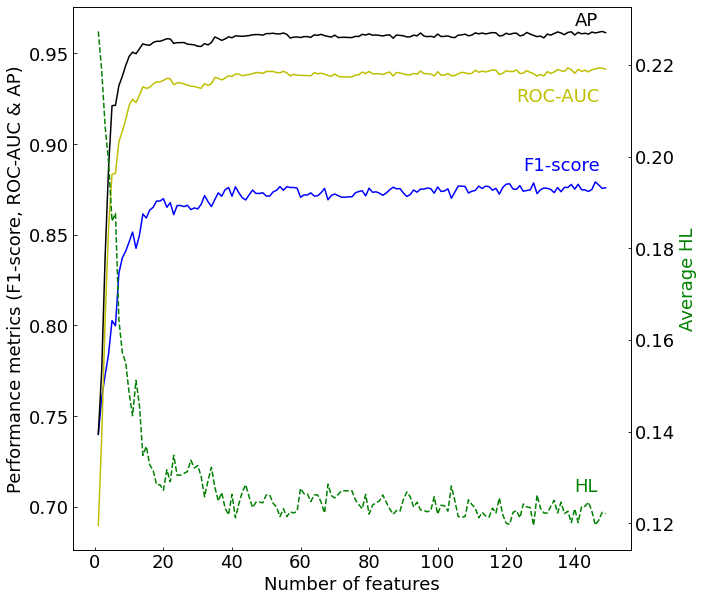

In [5]:
fig, ax1 = plt.subplots(figsize=(10, 10)) #, dpi=300)

n = 180

ax2 = ax1.twinx()
ax1.plot(df['validation_f1'][:n], 'b-')
ax1.plot(df['validation_roc_auc'][:n], 'y-')
ax1.plot(df['validation_avg_precision'][:n], 'k-')


ax2.plot(df['validation_hamming'][:n], 'g--')

fontsize=18
ax1.set_xlabel('Number of features', fontsize=fontsize)
ax1.set_ylabel('Performance metrics (F1-score, ROC-AUC & AP)', fontsize=fontsize, color='k') 
ax2.set_ylabel('Average HL', fontsize=fontsize, color='g')

ax1.tick_params(labelsize=fontsize, direction='in')
ax2.tick_params(labelsize=fontsize, direction='in')

x=125
y=0.197
plt.text(x, y, 'F1-score', c='b', fontsize=fontsize)
plt.text(x-2, y + 0.015, 'ROC-AUC', c='y', fontsize=fontsize)
plt.text(x+15, y + 0.0315, 'AP', c='k', fontsize=fontsize)


plt.text(x+15, y - 0.07, 'HL', c='g', fontsize=fontsize)


plt.savefig(path_to_save + 'class_gbfs_val_set.png', dpi = 500, bbox_inches="tight")

plt.show()

##### Statistical Analyses - Classification

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + str(target) + '_scaled.pkl'

# Either a list or saved file
features = path + 'features_is_metal.pkl'

problem = 'classification'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  is_metal
No. of exploratory features:  2496


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  38
No. of exploratory features:  2458


max_ionic_char  avg_ionic_char     H   He    Li   Be     B    C  \
mp-769962        0.846198        0.737630  0.00  0.0  0.25  0.0  0.00  0.0   
mp-759825        0.669879        0.522614  0.00  0.0  0.00  0.0  0.00  0.0   
mp-6748          0.897716        0.584997  0.00  0.0  0.00  0.0  0.00  0.0   
mp-720312        0.860597        0.537637  0.15  0.0  0.00  0.0  0.25  0.0   
mp-769917        0.765177        0.654387  0.00  0.0  0.00  0.0  0.00  0.0   

             N         O  ...  LUMO_element_ohe_Zn  LUMO_element_ohe_Zr  \
mp-769962  0.0  0.500000  ...                  0.0                  0.0   
mp-759825  0.0  0.333333  ...                  0.0                  0.0   
mp-6748    0.0  0.625000  ...                  0.0                  0.0   
mp-720312  0.0  0.500000  ...                  0.0                  0.0   
mp-769917  0.0  0.636364  ...                  0.0                  0.0   

           crystal_system_ohe_cubic  crystal_system_ohe_hexagonal  \
mp-769962                       0.0                           0.0   
mp-759825                       0.0                           0.0   
mp-6748                         0.0                           0.0   
mp-720312                       0.0                           0.0   
mp-769917                       1.0                           0.0   

           crystal_system_ohe_monoclinic  crystal_system_ohe_orthorhombic  \
mp-769962                            1.0                              0.0   
mp-759825                            0.0                              1.0   
mp-6748                              1.0                              0.0   
mp-720312                            1.0                              0.0   
mp-769917                            0.0                              0.0   

           crystal_system_ohe_tetragonal  crystal_system_ohe_triclinic  \
mp-769962                            0.0                           0.0   
mp-759825                            0.0                           0.0   
mp-6748                              0.0                           0.0   
mp-720312                            0.0                           0.0   
mp-769917                            0.0                           0.0   

           crystal_system_ohe_trigonal  is_metal  
mp-769962                          0.0         1  
mp-759825                          0.0         1  
mp-6748                            0.0         1  
mp-720312                          0.0         1  
mp-769917                          0.0         1  

[5 rows x 2459 columns]

In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem=problem, 
                                all_features=True, 
                                csv=False
                                )

df_anova[:10]

There are:
No. of categorical features:  187
No. of numerical features:  2271 

Considering all features. 

Result saved as:  ANOVA_F_test_result_is_metal_classification.pkl


feature_names   f_statistic  f_statistic_scaled
0                  max_packing_efficiency  15867.401725            1.000000
1                frac_p_valence_electrons  13815.470232            0.870683
2            MagpieData_maximum_NpValence  13193.372145            0.831477
3     MEGNetElementData_mean_embedding_10  12723.590375            0.801870
4      MEGNetElementData_mean_embedding_8  12717.640854            0.801495
5  MEGNetElementData_minimum_embedding_10  12155.919481            0.766094
6   MEGNetElementData_minimum_embedding_8  12044.497205            0.759072
7          DemlData_minimum_boiling_point  11673.694005            0.735703
9                 avg_p_valence_electrons  11571.225921            0.729245
8               MagpieData_mean_NpValence  11571.225921            0.729245

In [6]:
df_chi2 = analyses.chi2_test(csv=False)

df_chi2[:10]

There are:
No. of categorical features:  187
Result saved as: chi_squared_test_result_is_metal .pkl


feature_names  chi_squared  chi_squared_scaled
0             HOMO_element_ohe_O  2354.764851            1.000000
1       crystal_system_ohe_cubic  2139.909233            0.908757
2           HOMO_character_ohe_p  1875.032637            0.796271
3             LUMO_element_ohe_O  1150.201781            0.488454
4  crystal_system_ohe_monoclinic  1062.808139            0.451340
5           HOMO_character_ohe_s   964.649685            0.409655
6   crystal_system_ohe_hexagonal   910.566930            0.386688
7           LUMO_character_ohe_p   617.299223            0.262145
8           HOMO_character_ohe_d   557.112844            0.236585
9           HOMO_character_ohe_f   550.637223            0.233835

In [7]:
df_mi = analyses.mutual_information(
                                problem=problem, 
                                csv=False
                                )

df_mi[:10]

There are:
No. of categorical features:  187
No. of numerical features:  2271 

Result saved as: MI_result_is_metal.pkl


feature_names        MI  MI_scaled
0       jml_mol_vol_divi_therm_cond  0.259992   1.000000
1    jml_voro_coord_divi_therm_cond  0.259503   0.998121
2      jml_atom_rad_divi_therm_cond  0.258955   0.996014
3  jml_first_ion_en_divi_therm_cond  0.257620   0.990880
4          jml_first_ion_en_divi_bp  0.257078   0.988795
5               jml_mol_vol_divi_bp  0.254821   0.980112
6          jml_first_ion_en_divi_mp  0.252291   0.970382
7           jml_mol_vol_divi_polzbl  0.251325   0.966666
8     jml_atom_mass_divi_therm_cond  0.250255   0.962552
9               jml_mol_vol_divi_mp  0.247718   0.952790

In [8]:
df_ld = analyses.logistic_discrimination(
                                        target_classes=2, 
                                        class_names=['Metal', 'Non-Metal'], 
                                        csv=False
                                        )

df_ld[:10]

Result saved as: logistic_discrimination_result_is_metal.pkl


feature_names  coefficient
0      minimum_oxidation_state    -0.123047
1      maximum_oxidation_state     0.339672
2        range_oxidation_state    -0.043567
3      std_dev_oxidation_state     0.568362
4               max_ionic_char    -0.689274
5               avg_ionic_char    -0.123047
6  avg_anion_electron_affinity     0.437398
7        minimum_EN_difference     0.114440
8        maximum_EN_difference     0.300014
9          range_EN_difference     0.378682

#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'ricci_boltztrap_mp_tabular_merged_with_NaN_v2.pkl'  # all data

# Either a list or saved file
features = path + 'features_is_metal.pkl'

problem = 'classification'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_' + problem + '.pkl')

# Top n features
n = 3
anova_features = df_anova['feature_names'].tolist()[:n]

m = 5
df_anova.iloc[:m, :]

feature_names   f_statistic  f_statistic_scaled
0               max_packing_efficiency  15867.401725            1.000000
1             frac_p_valence_electrons  13815.470232            0.870683
2         MagpieData_maximum_NpValence  13193.372145            0.831477
3  MEGNetElementData_mean_embedding_10  12723.590375            0.801870
4   MEGNetElementData_mean_embedding_8  12717.640854            0.801495

In [4]:
# Top n features from chi2 
df_chi2 = joblib.load(path_to_save + 'chi_squared_test_result_' + target + '.pkl')

# Top n features
n = 3
chi2_features = df_chi2['feature_names'].tolist()[:n]

m = 5
df_chi2.iloc[:m, :]

feature_names  chi_squared  chi_squared_scaled
0             HOMO_element_ohe_O  2354.764851            1.000000
1       crystal_system_ohe_cubic  2139.909233            0.908757
2           HOMO_character_ohe_p  1875.032637            0.796271
3             LUMO_element_ohe_O  1150.201781            0.488454
4  crystal_system_ohe_monoclinic  1062.808139            0.451340

In [5]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 3
mi_features = df_mi['feature_names'].tolist()[:n]

m = 5
df_mi.iloc[:m, :]

feature_names        MI  MI_scaled
0       jml_mol_vol_divi_therm_cond  0.259992   1.000000
1    jml_voro_coord_divi_therm_cond  0.259503   0.998121
2      jml_atom_rad_divi_therm_cond  0.258955   0.996014
3  jml_first_ion_en_divi_therm_cond  0.257620   0.990880
4          jml_first_ion_en_divi_bp  0.257078   0.988795

In [6]:
# Top n features from LR 
df_ld = joblib.load(path_to_save + 'logistic_discrimination_result_' + target + '.pkl')

# Top and bottom n features
n = 2
df_ld = df_ld.sort_values('coefficient')
ld_features = df_ld['feature_names'].tolist()[:n] + df_ld['feature_names'].tolist()[-n:]

df_ld.iloc[:n, :], df_ld.iloc[-n:, :]

(                  feature_names  coefficient
 765  jml_first_ion_en_subs_hfus    -5.836506
 19                            O    -2.776133,
      feature_names  coefficient
 1719   jml_adf1_68     3.107973
 753         jml_C6     3.644746)

In [7]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 3
gbfs_features = df_gbfs['feature'].tolist()[:n]

m = 5
df_gbfs.iloc[:m, :]

feature  relevance_score
0  PymatgenData_maximum_coefficient_of_linear_the...     72556.612396
1          PymatgenData_minimum_thermal_conductivity     45387.516353
2                             max_packing_efficiency      8341.903227
3                          transition_metal_fraction      7966.444581
4                                             gap_AO      6305.289196

In [8]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  is_metal
No. of exploratory features:  2496


In [9]:
# Join the features
feature_list = anova_features + chi2_features + mi_features + ld_features + gbfs_features

print(len(feature_list))

16


In [10]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

Total number of permutation: 240
Invalid operations: 29


minimum_oxidation_state  maximum_oxidation_state  \
mp-623511                      0.0                      0.0   
mp-1992                        0.0                      0.0   
mp-27502                       0.0                      0.0   
mp-770629                      0.0                      0.0   
mp-27202                       0.0                      0.0   

           range_oxidation_state  std_dev_oxidation_state  compound_possible  \
mp-623511                    0.0                      0.0                  1   
mp-1992                      0.0                      0.0                  0   
mp-27502                     0.0                      0.0                  1   
mp-770629                    0.0                      0.0                  1   
mp-27202                     0.0                      0.0                  0   

           max_ionic_char  avg_ionic_char  avg_anion_electron_affinity  \
mp-623511        0.000000        0.000000                          0.0   
mp-1992          0.190712        0.044698                          0.0   
mp-27502         0.088829        0.016742                          0.0   
mp-770629        0.779730        0.171021                          0.0   
mp-27202         0.070306        0.004246                          0.0   

           minimum_EN_difference  maximum_EN_difference  ...  \
mp-623511                    0.0                    0.0  ...   
mp-1992                      0.0                    0.0  ...   
mp-27502                     0.0                    0.0  ...   
mp-770629                    0.0                    0.0  ...   
mp-27202                     0.0                    0.0  ...   

           PymatgenData_minimum_thermal_conductivity/HOMO_character_ohe_p  \
mp-623511                                            67.0000                
mp-1992                                               0.0000                
mp-27502                                              0.0089                
mp-770629                                             0.0000                
mp-27202                                              0.0000                

           PymatgenData_minimum_thermal_conductivity/jml_mol_vol_divi_therm_cond  \
mp-623511                                         275.567833                       
mp-1992                                             0.000000                       
mp-27502                                            0.000011                       
mp-770629                                           0.000163                       
mp-27202                                            0.003890                       

           PymatgenData_minimum_thermal_conductivity/jml_voro_coord_divi_therm_cond  \
mp-623511                                         897.800000                          
mp-1992                                             0.000000                          
mp-27502                                            0.000047                          
mp-770629                                           0.000940                          
mp-27202                                            0.014910                          

           PymatgenData_minimum_thermal_conductivity/jml_atom_rad_divi_therm_cond  \
mp-623511                                        3095.862069                        
mp-1992                                             0.000000                        
mp-27502                                            0.000194                        
mp-770629                                           0.004702                        
mp-27202                                            0.086027                        

           PymatgenData_minimum_thermal_conductivity/jml_first_ion_en_subs_hfus  \
mp-623511                                           9.212889                      
mp-1992                                             0.000000                      
mp-27502                                            0.000711          

In [11]:
perform.save()

Result saved as: df_is_metal_engineered_features.pkl
Result saved as: features_is_metal_engineered.pkl
Result saved as: df_train_is_metal_engineered.pkl
Result saved as: df_test_is_metal_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 60 # Most relevant features defined using the GBFS result

gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'classification'

print('No. of columns from GBFS:', len(gbfs_cols))
print('No. of new columns:',len(new_cols))

len(features)

No. of columns from GBFS: 60
No. of new columns: 211


271

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  is_metal
No. of exploratory features:  271


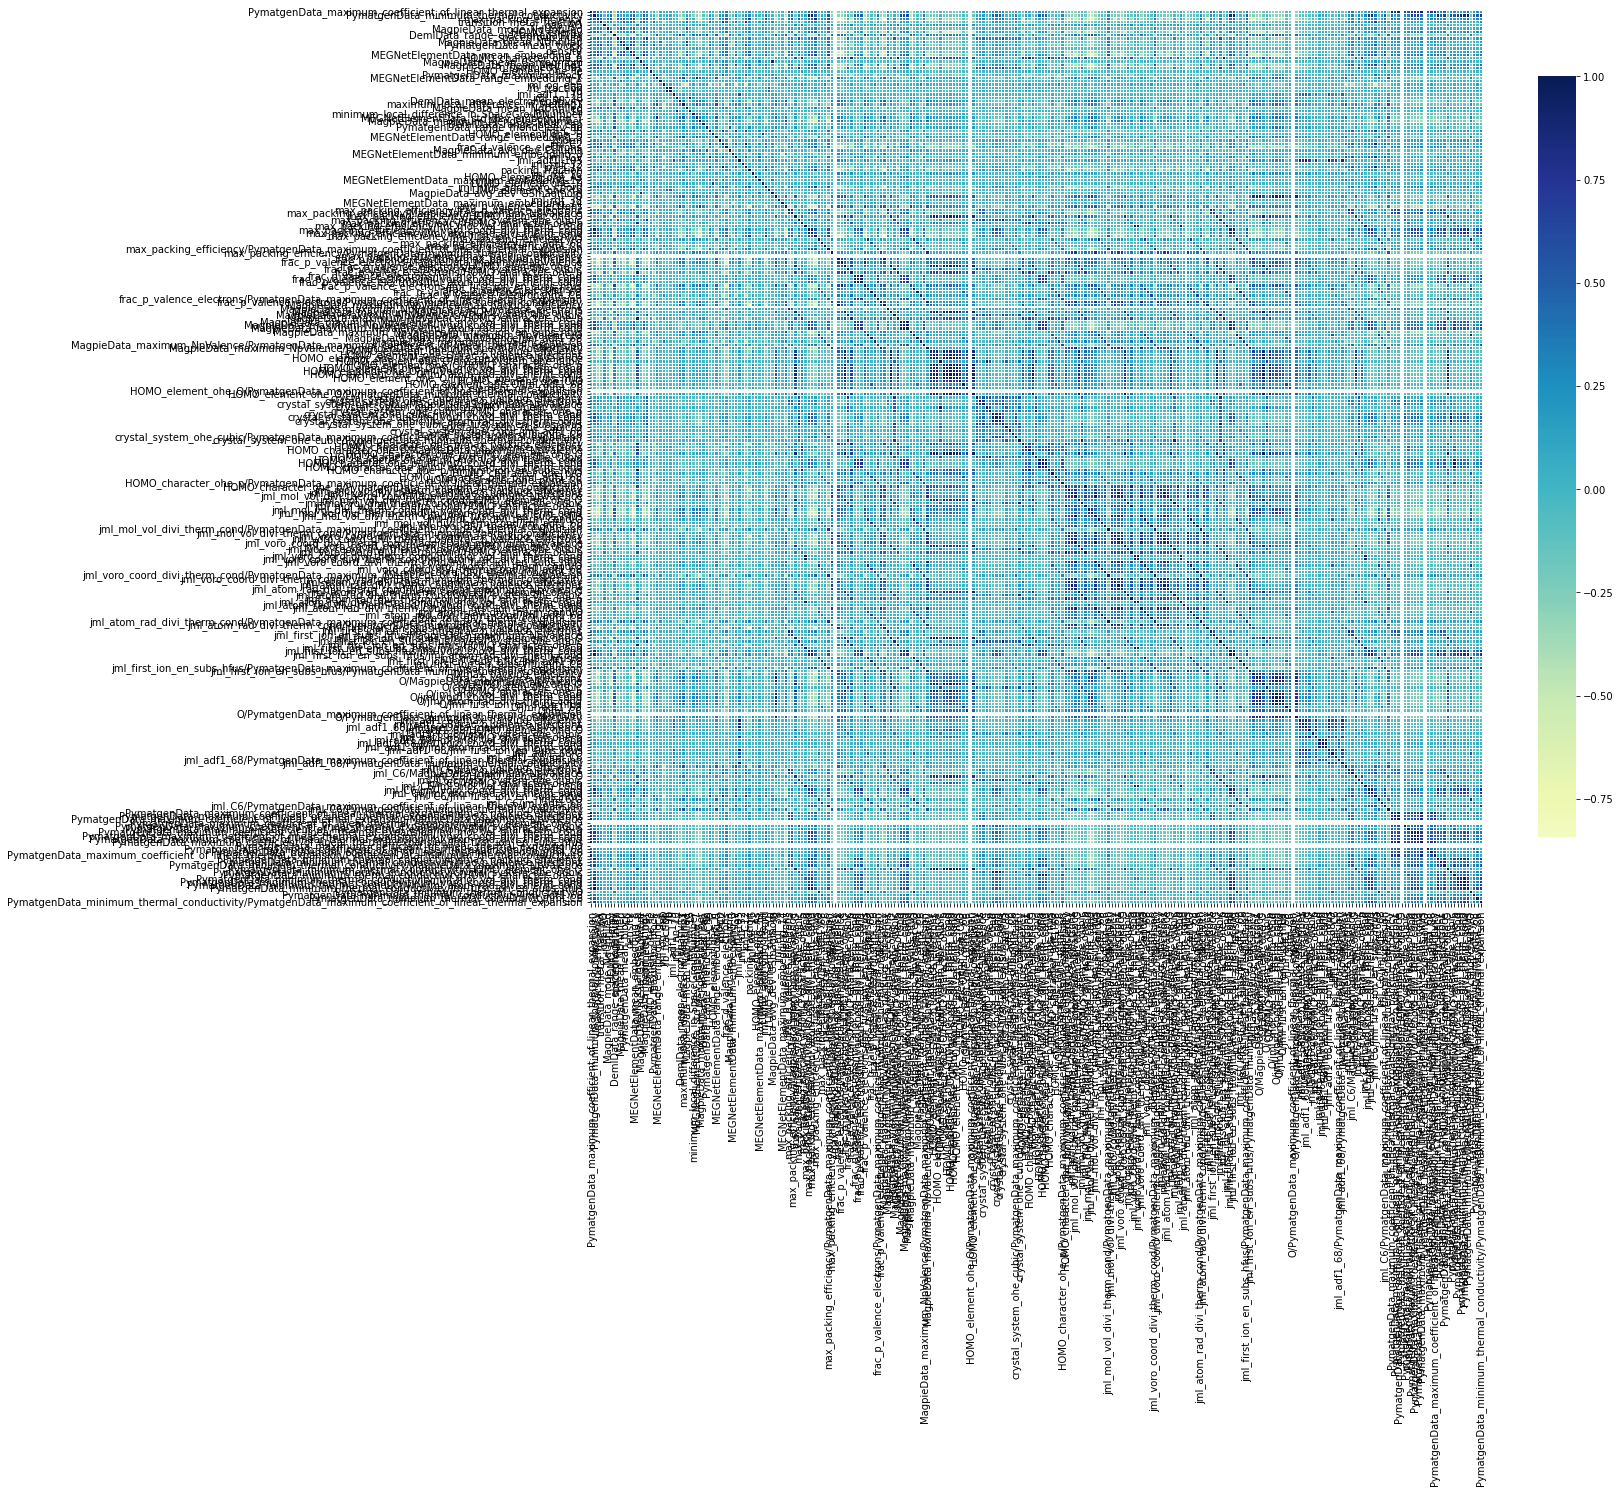

Figure saved as: "correlation_heatmap.png"


In [4]:
data.correlation_heatmap()

In [5]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  163
Features saved as: features_selected_from_correlation_analysis_is_metal.pkl


In [6]:
len(new_features)

163

In [7]:
# joblib.dump(new_features, path_to_save + 'is_metal_multicol_features.pkl')

In [8]:
df_list = pd.read_csv(path_to_save + 'feature_list_for_hierarchical_is_metal.csv')
df_list.head()

Unnamed: 0                              hierarchical_features  \
0           0  PymatgenData_maximum_coefficient_of_linear_the...   
1           1          PymatgenData_minimum_thermal_conductivity   
2           2                             max_packing_efficiency   
3           3                          transition_metal_fraction   
4           4                                             gap_AO   

   feature_number                                           features  \
0             317  PymatgenData_maximum_coefficient_of_linear_the...   
1             301          PymatgenData_minimum_thermal_conductivity   
2            2170                             max_packing_efficiency   
3             116                          transition_metal_fraction   
4             605                                             gap_AO   

   alternative_feature_name                  featurizer           feature_type  
0                       NaN  ElementProperty - Matminer           composition   
1                       NaN  ElementProperty - Matminer           composition   
2                       NaN    MaximumPackingEfficiency     structure - order   
3                       NaN              TMetalFraction  composition - element  
4                       NaN              AtomicOrbitals  composition - orbital

In [9]:
import collections
compare = lambda x, y: collections.Counter(x) == collections.Counter(y)

# Check the lists are identical
compare(new_features, df_list['hierarchical_features'].tolist())


True

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_is_metal.png


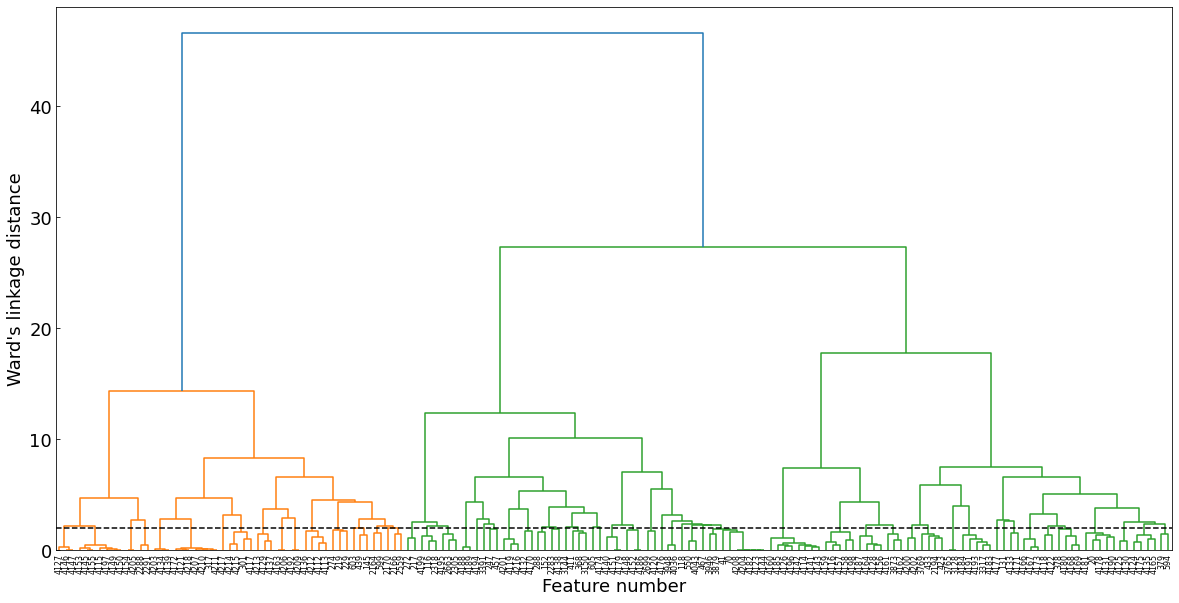

In [10]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
x_list = df_list['feature_number'].tolist()

data.hierarchical_cluster_analysis(x_label_in_numbers=True, x_fontsize=7.9, x_list=x_list, horizontal_line=2)

Figure saved as: Dendrogram_is_metal.png


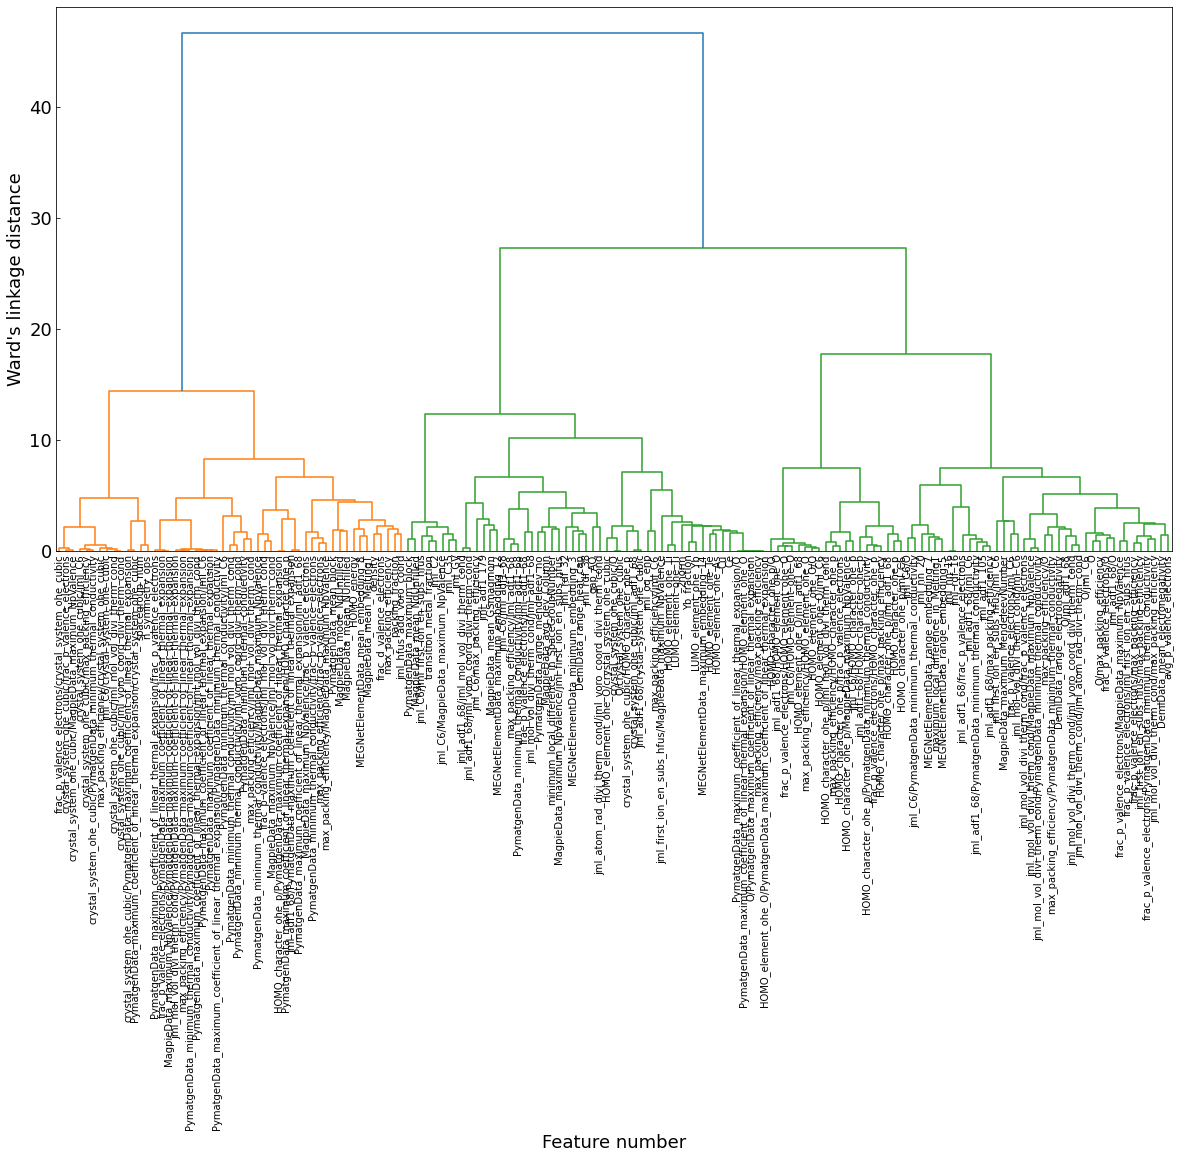

In [11]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis(x_label_in_numbers=False)

In [7]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5, 6]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  108
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_1.pkl
Number of features remaining:  58
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_2.pkl
Number of features remaining:  33
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_3.pkl
Number of features remaining:  24
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_4.pkl
Number of features remaining:  18
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_5.pkl
Number of features remaining:  14
Features saved as features_selected_from_hierarchical_analysis_is_metal_threshold_6.pkl


Create list of feature numbers

In [19]:
new_features =  joblib.load(path_to_save + 'is_metal_multicol_features.pkl')

df_hi = pd.DataFrame({'hierarchical_features':new_features})
len(df_hi)

163

In [20]:
df_features = pd.read_csv('full_feature_list4.csv')
print(len(df_features))

df_features.head()

4219


feature_number                 features alternative_feature_name  \
0               0  minimum_oxidation_state                      NaN   
1               1  maximum_oxidation_state                      NaN   
2               2    range_oxidation_state                      NaN   
3               3  std_dev_oxidation_state                      NaN   
4               4        compound_possible                      NaN   

        featurizer       feature_type  
0  OxidationStates  composition - ion  
1  OxidationStates  composition - ion  
2  OxidationStates  composition - ion  
3  OxidationStates  composition - ion  
4      IonProperty  composition - ion

In [21]:
df = df_hi.merge(df_features, left_on='hierarchical_features', right_on='features', how='left')
print(len(df))
df.head()

163


hierarchical_features  feature_number  \
0  PymatgenData_maximum_coefficient_of_linear_the...             317   
1          PymatgenData_minimum_thermal_conductivity             301   
2                             max_packing_efficiency            2170   
3                          transition_metal_fraction             116   
4                                             gap_AO             605   

                                            features alternative_feature_name  \
0  PymatgenData_maximum_coefficient_of_linear_the...                      NaN   
1          PymatgenData_minimum_thermal_conductivity                      NaN   
2                             max_packing_efficiency                      NaN   
3                          transition_metal_fraction                      NaN   
4                                             gap_AO                      NaN   

                   featurizer           feature_type  
0  ElementProperty - Matminer           composition   
1  ElementProperty - Matminer           composition   
2    MaximumPackingEfficiency     structure - order   
3              TMetalFraction  composition - element  
4              AtomicOrbitals  composition - orbital

In [22]:
df['feature_number'] = df['feature_number'].astype("string")
df.head()

hierarchical_features feature_number  \
0  PymatgenData_maximum_coefficient_of_linear_the...            317   
1          PymatgenData_minimum_thermal_conductivity            301   
2                             max_packing_efficiency           2170   
3                          transition_metal_fraction            116   
4                                             gap_AO            605   

                                            features alternative_feature_name  \
0  PymatgenData_maximum_coefficient_of_linear_the...                      NaN   
1          PymatgenData_minimum_thermal_conductivity                      NaN   
2                             max_packing_efficiency                      NaN   
3                          transition_metal_fraction                      NaN   
4                                             gap_AO                      NaN   

                   featurizer           feature_type  
0  ElementProperty - Matminer           composition   
1  ElementProperty - Matminer           composition   
2    MaximumPackingEfficiency     structure - order   
3              TMetalFraction  composition - element  
4              AtomicOrbitals  composition - orbital

In [23]:
df.to_csv(path_to_save + 'feature_list_for_hierarchical_is_metal.csv')

#### Permutation importance

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import permutation_importance as pi

import joblib
import pandas as pd

In [2]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

scaled = False

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
len(features)

58

In [3]:
# All features
df_features = pd.read_csv('full_feature_list4.csv')
print(len(df_features))

df_features.head()

4219


feature_number                 features alternative_feature_name  \
0               0  minimum_oxidation_state                      NaN   
1               1  maximum_oxidation_state                      NaN   
2               2    range_oxidation_state                      NaN   
3               3  std_dev_oxidation_state                      NaN   
4               4        compound_possible                      NaN   

        featurizer       feature_type  
0  OxidationStates  composition - ion  
1  OxidationStates  composition - ion  
2  OxidationStates  composition - ion  
3  OxidationStates  composition - ion  
4      IonProperty  composition - ion

In [4]:
# Selected features
df_hi = pd.DataFrame({'hierarchical_features':features})
len(df_hi)

58

In [5]:
# Merge the two df
df = df_hi.merge(df_features, left_on='hierarchical_features', right_on='features', how='left')
print(len(df))
df.head()

58


hierarchical_features  feature_number  \
0  PymatgenData_maximum_coefficient_of_linear_the...             317   
1          PymatgenData_minimum_thermal_conductivity             301   
2                             max_packing_efficiency            2170   
3                          transition_metal_fraction             116   
4                                             gap_AO             605   

                                            features alternative_feature_name  \
0  PymatgenData_maximum_coefficient_of_linear_the...                      NaN   
1          PymatgenData_minimum_thermal_conductivity                      NaN   
2                             max_packing_efficiency                      NaN   
3                          transition_metal_fraction                      NaN   
4                                             gap_AO                      NaN   

                   featurizer           feature_type  
0  ElementProperty - Matminer           composition   
1  ElementProperty - Matminer           composition   
2    MaximumPackingEfficiency     structure - order   
3              TMetalFraction  composition - element  
4              AtomicOrbitals  composition - orbital

In [6]:
df['feature_number'] = df['feature_number'].astype("string")
df.head()

hierarchical_features feature_number  \
0  PymatgenData_maximum_coefficient_of_linear_the...            317   
1          PymatgenData_minimum_thermal_conductivity            301   
2                             max_packing_efficiency           2170   
3                          transition_metal_fraction            116   
4                                             gap_AO            605   

                                            features alternative_feature_name  \
0  PymatgenData_maximum_coefficient_of_linear_the...                      NaN   
1          PymatgenData_minimum_thermal_conductivity                      NaN   
2                             max_packing_efficiency                      NaN   
3                          transition_metal_fraction                      NaN   
4                                             gap_AO                      NaN   

                   featurizer           feature_type  
0  ElementProperty - Matminer           composition   
1  ElementProperty - Matminer           composition   
2    MaximumPackingEfficiency     structure - order   
3              TMetalFraction  composition - element  
4              AtomicOrbitals  composition - orbital

In [7]:
# Just the feature number
x_list = df['feature_number']
len(x_list)

58

In [8]:
# Initialize module with path_to_file and path_to_save
run = pi.permutation_importance_of_features(
                                            path_to_file, 
                                            path_to_save, 
                                            target=target,
                                            features = features,
                                            scaled = scaled,
                                            problem = problem
                                            )

Target: is_metal
No. of features: 58


In [9]:
# Run PI
estimator = run.base_model(boosting_method = 'lightGBM')
results = run.perform(cv_fold=10, save=True)


Saved as C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/is_metal_results/permutation_importance.pkl


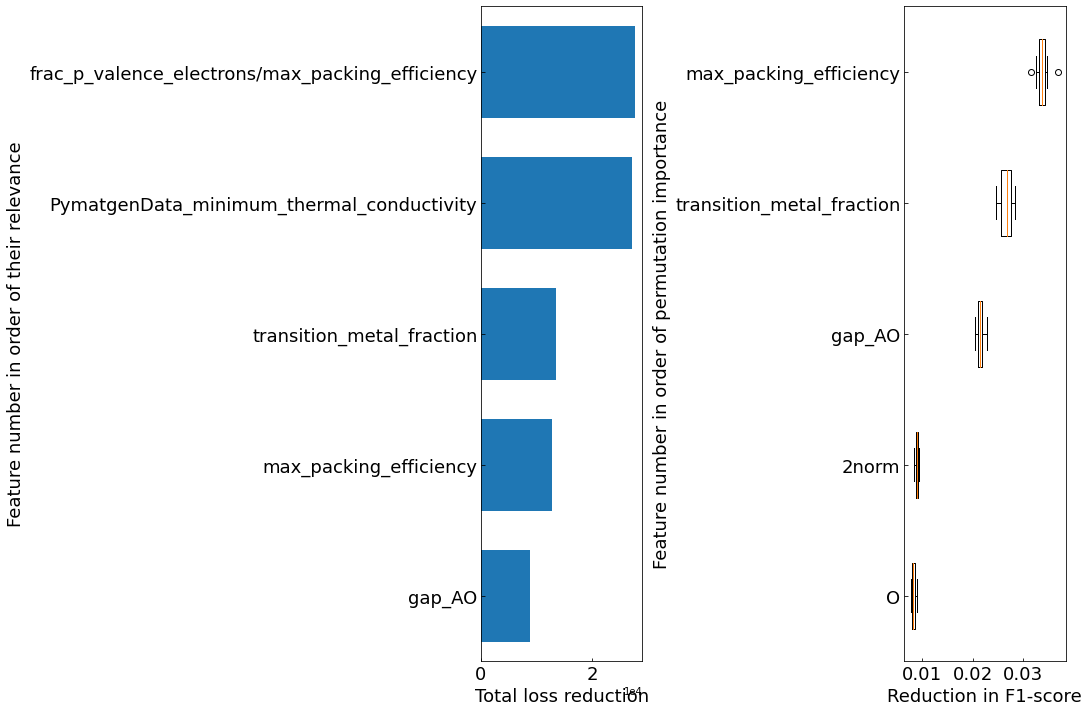

Figure saved as: permutation_importance_plot_is_metal.png


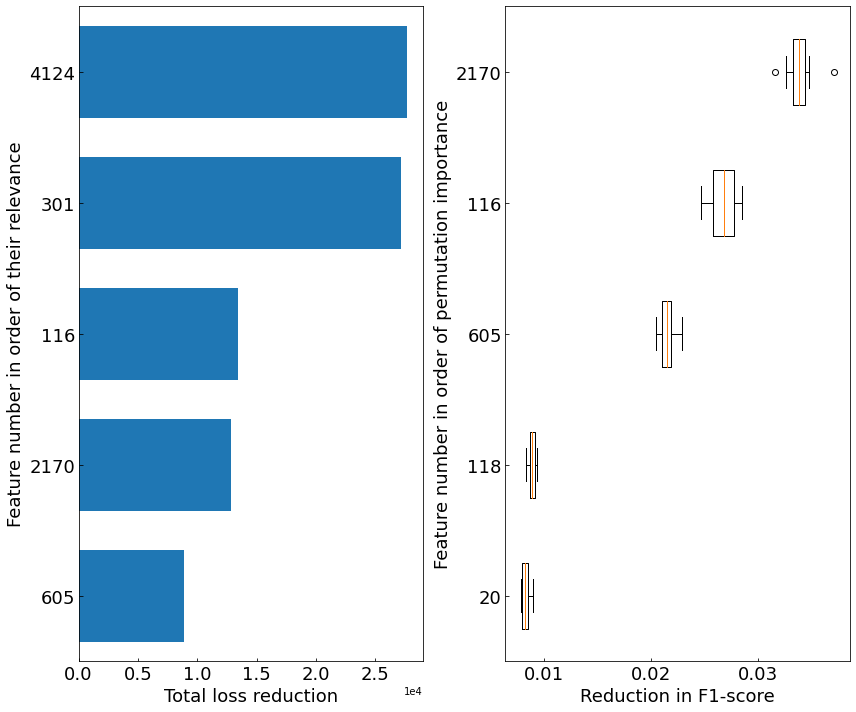

Figure saved as: permutation_importance_plot_is_metal.png


In [10]:
run.plot(top_n=5, x_list=None)
feature_list, permutation_scores = run.plot(top_n=5, x_list=x_list)

#### Test Dummy Model

In [8]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [9]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'classification'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
len(features)

58

In [10]:
df_test

minimum_oxidation_state  maximum_oxidation_state  \
mp-11322                       0.0                      0.0   
mp-4809                        0.0                      0.0   
mp-772431                      0.0                      0.0   
mp-336                         0.0                      0.0   
mp-504708                      0.0                      0.0   
...                            ...                      ...   
mp-720554                      0.0                      0.0   
mp-764408                      0.0                      0.0   
mp-755870                      0.0                      0.0   
mp-696941                      0.0                      0.0   
mp-5186                        0.0                      0.0   

           range_oxidation_state  std_dev_oxidation_state  compound_possible  \
mp-11322                     0.0                      0.0                  1   
mp-4809                      0.0                      0.0                  1   
mp-772431                    0.0                      0.0                  0   
mp-336                       0.0                      0.0                  0   
mp-504708                    0.0                      0.0                  1   
...                          ...                      ...                ...   
mp-720554                    0.0                      0.0                  1   
mp-764408                    0.0                      0.0                  1   
mp-755870                    0.0                      0.0                  1   
mp-696941                    0.0                      0.0                  0   
mp-5186                      0.0                      0.0                  0   

           max_ionic_char  avg_ionic_char  avg_anion_electron_affinity  \
mp-11322         0.078014        0.019503                          0.0   
mp-4809          0.137763        0.029443                          0.0   
mp-772431        0.455779        0.078411                          0.0   
mp-336           0.118407        0.026313                          0.0   
mp-504708        0.754443        0.141142                          0.0   
...                   ...             ...                          ...   
mp-720554        0.894601        0.118309                          0.0   
mp-764408        0.894601        0.187290                          0.0   
mp-755870        0.792998        0.188093                          0.0   
mp-696941        0.820234        0.152622                          0.0   
mp-5186          0.086069        0.017726                          0.0   

           minimum_EN_difference  maximum_EN_difference  ...  \
mp-11322                     0.0                    0.0  ...   
mp-4809                      0.0                    0.0  ...   
mp-772431                    0.0                    0.0  ...   
mp-336                       0.0                    0.0  ...   
mp-504708                    0.0                    0.0  ...   
...                          ...                    ...  ...   
mp-720554                    0.0                    0.0  ...   
mp-764408                    0.0                    0.0  ...   
mp-755870                    0.0                    0.0  ...   
mp-696941                    0.0                    0.0  ...   
mp-5186                      0.0                    0.0  ...   

           PymatgenData_minimum_thermal_conductivity/HOMO_character_ohe_p  \
mp-11322                                            23.00000                
mp-4809                                              0.20500                
mp-772431                                            0.00000                
mp-336                                               0.00000                
mp-504708                                            0.00890                
...                                                      ...                
mp-720554                                            0.02583                
mp-764408          

In [11]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        random_state=42,
                        learning_rate=0.1,
                        n_estimators=400,
                        num_leaves=40,
                        #target_classes=['Direct', 'Indirect']
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=400, num_leaves=40,
               objective='binary', random_state=42)

In [12]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['Indirect', 'Direct'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))

1. The F-1 score of the model 0.8958099712919835

2. The recall score of the model 0.8971512358609133

3. Classification report 
               precision    recall  f1-score   support

    Indirect      0.898     0.806     0.850      3440
      Direct      0.897     0.949     0.922      6108

    accuracy                          0.897      9548
   macro avg      0.897     0.877     0.886      9548
weighted avg      0.897     0.897     0.896      9548
 

4. Classification report 
 [[[5794  314]
  [ 668 2772]]

 [[2772  668]
  [ 314 5794]]] 

5. Confusion matrix 
 [[2772  668]
 [ 314 5794]] 

6. Accuracy score 
 0.8971512358609133 

7. Balanced accuracy score 
 0.8772029819832168 



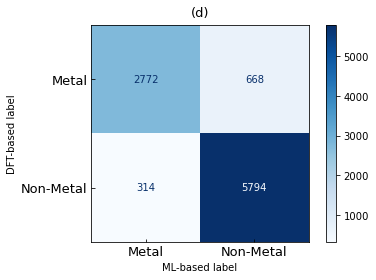

In [13]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Metal', 'Non-Metal'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
# plt.savefig('confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Recursive Feature Elimination

In [14]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [15]:
# Target
target = 'is_metal'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_2.pkl')
print(len(features))

scaled = False

problem = 'classification'

58


In [16]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: is_metal
No. of features: 58


In [17]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM', objective='binary')
RFE_features = run.perform(cv_fold=10)

Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 fe

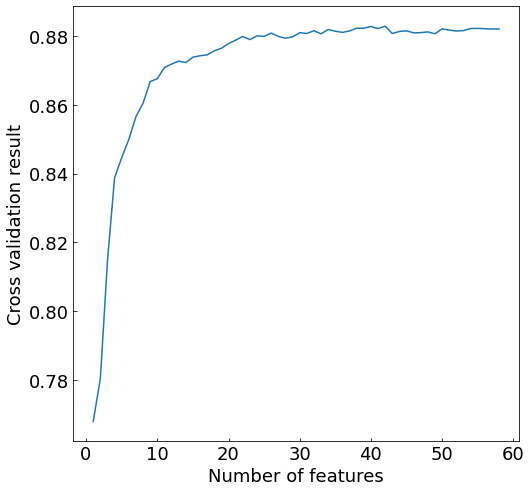

Figure saved as: RFE_plot_is_metal.png


In [18]:
# Plot figure
run.RFE_plot()

Get pretty graph

In [14]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path2 = path + target + '_results/'
path_to_save = path + target + '_results_backup/'

selector = joblib.load(path2 + 'RFECV_selector_is_metal.pkl')
#refined_features_4 = joblib.load(path_to_save + 'features_selected_from_RFE_log10K_VRH.pkl')


In [15]:
RFECV_importance = selector.ranking_
RFECV_grid_score = selector.grid_scores_
#RFECV_features = refined_features_4

RFECV_features = pd.DataFrame({#'features': RFECV_features, 
                                'importance_score':RFECV_importance,
                                'grid_scores_':RFECV_grid_score,
                                })
RFECV_features = RFECV_features.sort_values(by='importance_score', ascending=True)
RFECV_features = RFECV_features.reset_index(drop=True)
RFECV_features

importance_score  grid_scores_
0                  1      0.767835
1                  1      0.879945
2                  1      0.880902
3                  1      0.879918
4                  1      0.879397
5                  1      0.882081
6                  1      0.881005
7                  1      0.880777
8                  1      0.881590
9                  1      0.881938
10                 1      0.882316
11                 1      0.882298
12                 1      0.882199
13                 1      0.882902
14                 1      0.881369
15                 1      0.882121
16                 1      0.881775
17                 1      0.881489
18                 1      0.881618
19                 1      0.882171
20                 1      0.880089
21                 1      0.879000
22                 1      0.879811
23                 1      0.878842
24                 1      0.780366
25                 1      0.814655
26                 1      0.838828
27                 1      0.844630
28                 1      0.856575
29                 1      0.860523
30                 1      0.879909
31                 1      0.867630
32                 1      0.870871
33                 1      0.866776
34                 1      0.882073
35                 1      0.877815
36                 1      0.876477
37                 1      0.872726
38                 1      0.875727
39                 1      0.873877
40                 1      0.874558
41                 1      0.874293
42                 2      0.849965
43                 3      0.881512
44                 4      0.872305
45                 5      0.881436
46                 6      0.881106
47                 7      0.882219
48                 8      0.880681
49                 9      0.881232
50                10      0.882810
51                11      0.880772
52                12      0.881541
53                13      0.880694
54                14      0.871883
55                15      0.881028
56                16      0.880961
57                17      0.882254

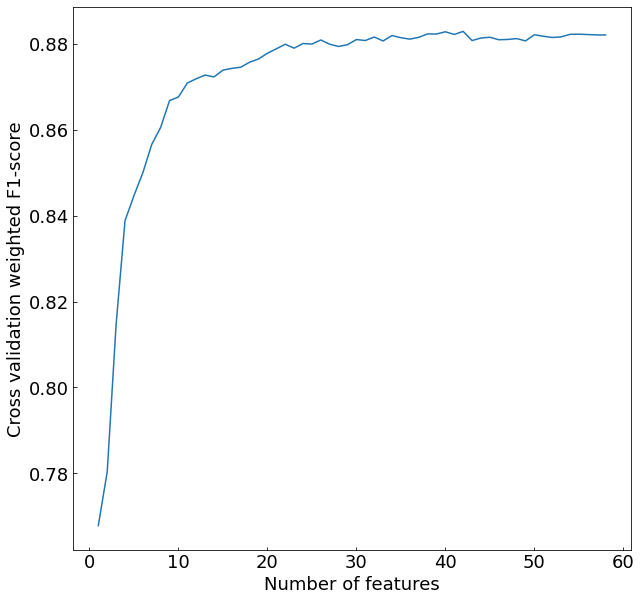

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

fontsize = 18
# plt.title('(b)', fontsize=fontsize+5, y=1.01) 
plt.xlabel('Number of features', fontsize=fontsize)
plt.ylabel('Cross validation weighted F1-score', fontsize=fontsize)
plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
#plt.grid(which = 'major')

min_features_to_select = 1

plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),
        selector.grid_scores_)

plt.savefig(path2 + 'class_rfe.png', dpi = 500, bbox_inches="tight")

plt.show()

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

Preliminary optimization 

In [68]:
from skopt import forest_minimize, gbrt_minimize, gp_minimize, dummy_minimize
from sklearn.model_selection import cross_val_score
from skopt.utils import use_named_args
from skopt.space import Real, Integer
from skopt import dump, load
from skopt.plots import plot_convergence, plot_objective, plot_evaluations
from skopt import space

import joblib
import pandas as pd
import numpy as np

### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [69]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [70]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)

In [88]:
lgbm = LGBMClassifier(
                    objective='binary',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', n_estimators=350, num_leaves=40,
               objective='binary', random_state=42)

In [89]:
estimator = lgbm

space = [
            Real(0.01, 1.0, name='learning_rate', prior='log-uniform'),
            Integer(100, 800, name='n_estimators'),
            Integer(10, 100, name='num_leaves')
            ]

hyperparameters = [
                        'learning_rate',
                        'n_estimators',
                        'num_leaves'
                        ]


@use_named_args(space)
def objective(**params):
    """
    Define the objective function
    """
    # Performance metric to consider
    if problem == 'classification':
        scoring = 'f1_weighted'

    elif problem == 'regression':
        scoring = 'neg_root_mean_squared_error'

    estimator.set_params(**params)
    
    print('\n', params, '\n')
    
    score = -np.mean(cross_val_score(
                                    estimator, 
                                    df_train[features], 
                                    df_train[target], 
                                    cv = 5, 
                                    n_jobs = -1, 
                                    scoring = scoring
                                    )
                    )
    
    print('Score: ', score, '\n')
    return score

In [90]:
def run(minimizer):
    opt = minimizer(objective, space, n_calls=100, random_state=42, verbose = 1)
    return opt

# Random search
dummy_res = run(dummy_minimize)

# Gaussian processes
gp_res_temp = run(gp_minimize)

# Gaussian processes
gbrt_res = run(gbrt_minimize)

# Random forest
fm_res = run(forest_minimize)

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.3918194347141743, 'n_estimators': 370, 'num_leaves': 81} 

Score:  -0.8891130800633883 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 3.5842
Function value obtained: -0.8891
Current minimum: -0.8891
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.1575132049977973, 'n_estimators': 714, 'num_leaves': 92} 

Score:  -0.8876965825819405 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.0744
Function value obtained: -0.8877
Current minimum: -0.8891
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.01584710121043909, 'n_estimators': 558, 'num_leaves': 97} 

Score:  -0.8861913136561145 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.3588
Function value obtained: -0.8862
Current minimum: -0.8891
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate':

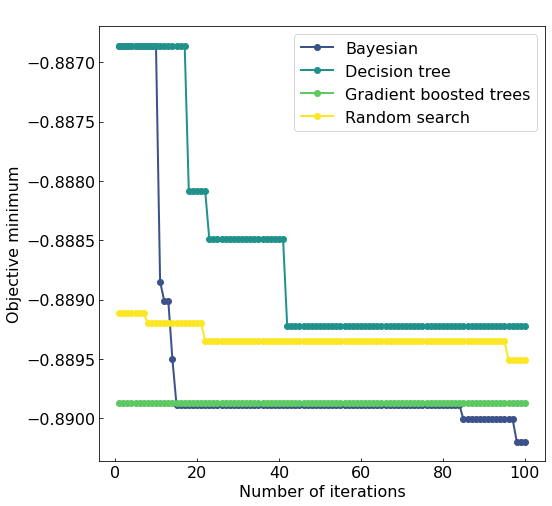

In [91]:
# Setting up the figure
fig, ax = plt.subplots(figsize = (8,8))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.grid(b = None)

fontsize = 16

plot = plot_convergence(("Bayesian", gp_res_temp),
                        ("Decision tree", fm_res),
                        ("Gradient boosted trees", gbrt_res),
                        ("Random search", dummy_res),
                        #yscale="log"
                        )

plot.legend(loc="best", prop={'size': fontsize}, numpoints=1)
ax.set_title(' ', fontsize = 18)
ax.set_xlabel('Number of iterations', fontsize = fontsize)
ax.set_ylabel('Objective minimum', fontsize = fontsize) 
ax.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')


#final_figure
#fig.savefig(path_to_save + 'Sequential_optimisation_regression.png', dpi = 500, bbox_inches="tight")

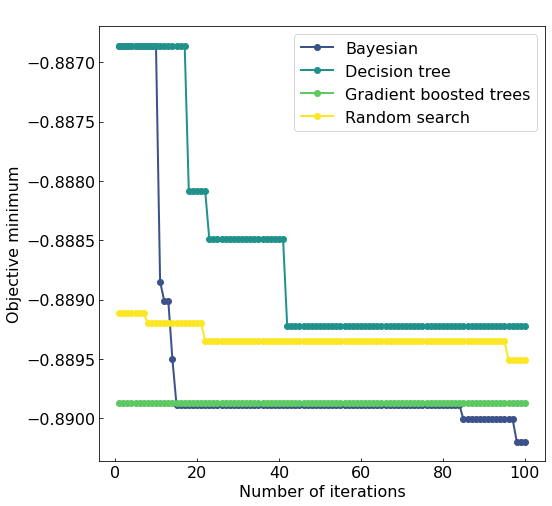

In [92]:
# Setting up the figure
fig, ax = plt.subplots(figsize = (8,8))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.grid(b = None)

fontsize = 16

plot = plot_convergence(("Bayesian", gp_res_temp),
                        ("Decision tree", fm_res),
                        ("Gradient boosted trees", gbrt_res),
                        ("Random search", dummy_res),
                        #yscale="log"
                        )

plot.legend(loc="best", prop={'size': fontsize}, numpoints=1)
ax.set_title(' ', fontsize = 18)
ax.set_xlabel('Number of iterations', fontsize = fontsize)
ax.set_ylabel('Objective minimum', fontsize = fontsize) 
ax.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')


#final_figure
fig.savefig(path_to_save + 'Sequential_optimisation_regression.png', dpi = 500, bbox_inches="tight")

In [11]:
# df_train = joblib.load(path_to_train_data)
# df_test = joblib.load(path_to_test_data)

# df_train.replace({'Yes': 0, 'No': 1}, inplace=True)
# df_test.replace({'Yes': 0, 'No': 1}, inplace=True)

# joblib.dump(df_train , path_to_train_data)
# joblib.dump(df_test , path_to_test_data)

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/is_metal_results/df_test_is_metal_engineered.pkl']

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  is_metal
No. of exploratory features:  42


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM', objective='binary')

LGBMClassifier(importance_type='gain', objective='binary', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian', n_calls=100)

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.011581253222543064, 'n_estimators': 266, 'num_leaves': 94} 

Score:  -0.8814846258534466 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.4447
Function value obtained: -0.8815
Current minimum: -0.8815
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.011188064151465244, 'n_estimators': 157, 'num_leaves': 59} 

Score:  -0.8677424085491386 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.1099
Function value obtained: -0.8677
Current minimum: -0.8815
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.7418862986418329, 'n_estimators': 730, 'num_leaves': 28} 

Score:  -0.7243749750998237 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 6.0131
Function value obtained: -0.7244
Current minimum: -0.8815
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rat

Saved: Optimisation_result_is_metal.png


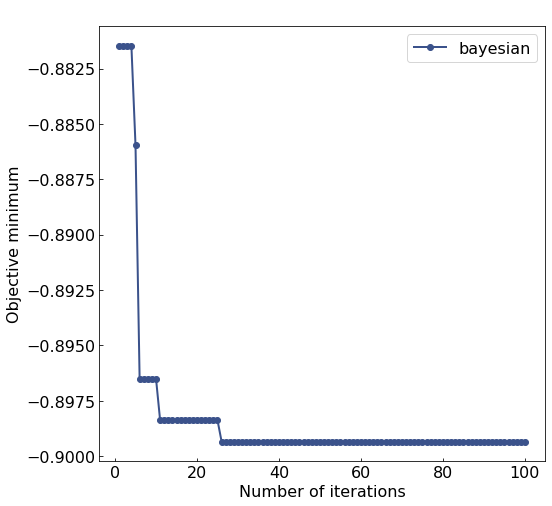

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

<Figure size 720x720 with 0 Axes>

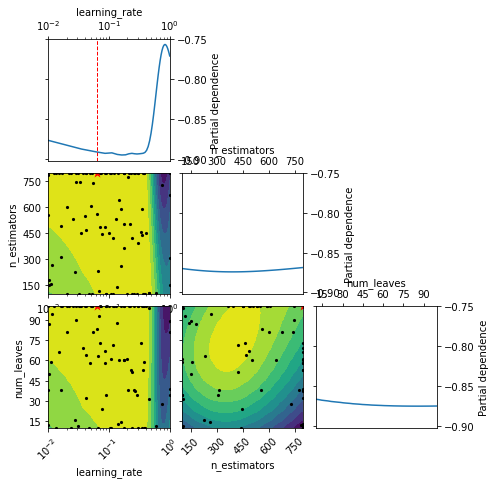

<Figure size 720x720 with 0 Axes>

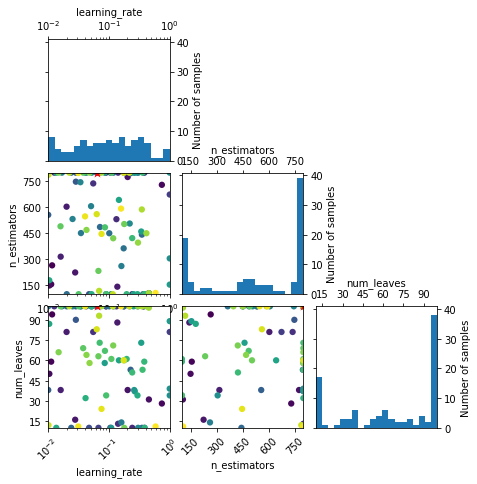

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

<Figure size 720x720 with 0 Axes>

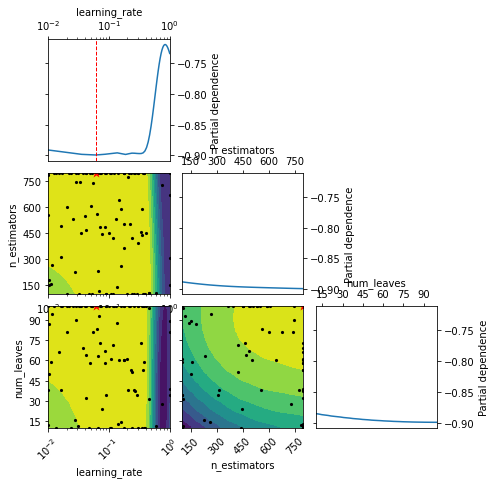

In [9]:
# objective and evaluation plot # expected_minimum_random, expected_minimum
final_stage.objective_plot_adjust(sample_source='expected_minimum', minimum='expected_minimum', n_minimum_search=2)

In [10]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMClassifier(importance_type='gain', learning_rate=0.06275986160315679,
               n_estimators=800, num_leaves=100, objective='binary',
               random_state=42)

1. The F-1 score of the model 0.9007234954907519

2. The recall score of the model 0.9019689987431923

3. Classification report 
               precision    recall  f1-score   support

       Metal       0.90      0.81      0.86      3440
   Non-Metal       0.90      0.95      0.93      6108

    accuracy                           0.90      9548
   macro avg       0.90      0.88      0.89      9548
weighted avg       0.90      0.90      0.90      9548
 

4. Classification report 
 [[[5813  295]
  [ 641 2799]]

 [[2799  641]
  [ 295 5813]]] 

5. Confusion matrix 
 [[2799  641]
 [ 295 5813]] 

6. Accuracy score 
 0.9019689987431923 

7. Balanced accuracy score 
 0.8826827378504745 



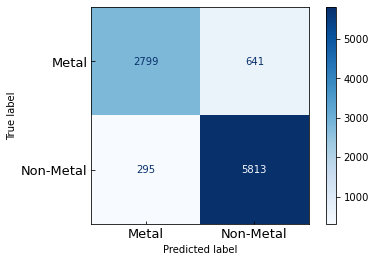

Saved: Confusion_matrix_is_metal.png


In [11]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy='weighted', 
                    target_names=['Metal', 'Non-Metal']
                    )

roc_auc_score: 0.9584976479569303


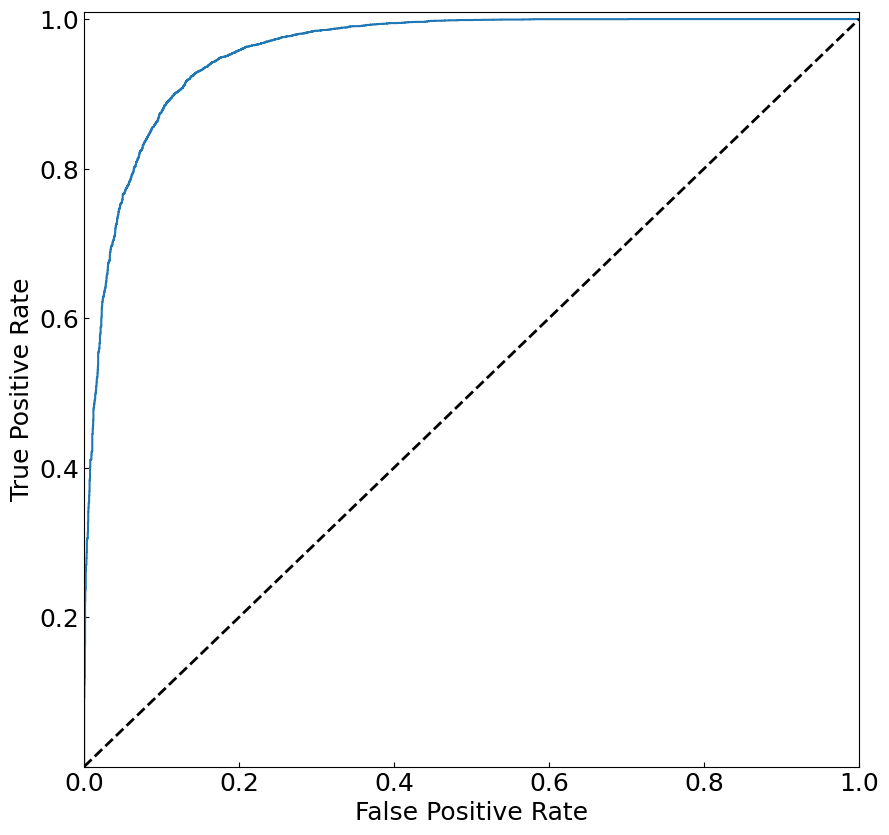

Saved: Receiver_operating_characteristic_curve_is_metal.png


In [12]:
# Evaluate model using test set
final_stage.ROC(
                overall_performance=True,
                positive_class=1
                )

DET equal error rate: 0.00262


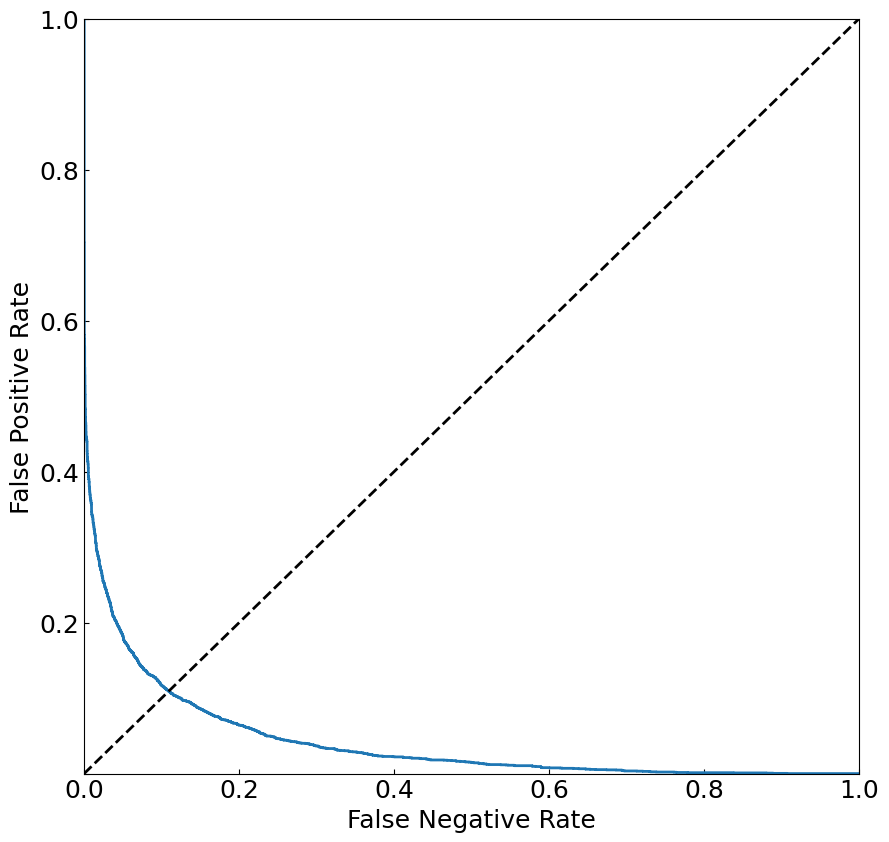

Saved: detection_error_tradeoff_curves_is_metal.png


In [13]:
# Evaluate model using test set
final_stage.DET()

average_precision: 0.9728094361777461


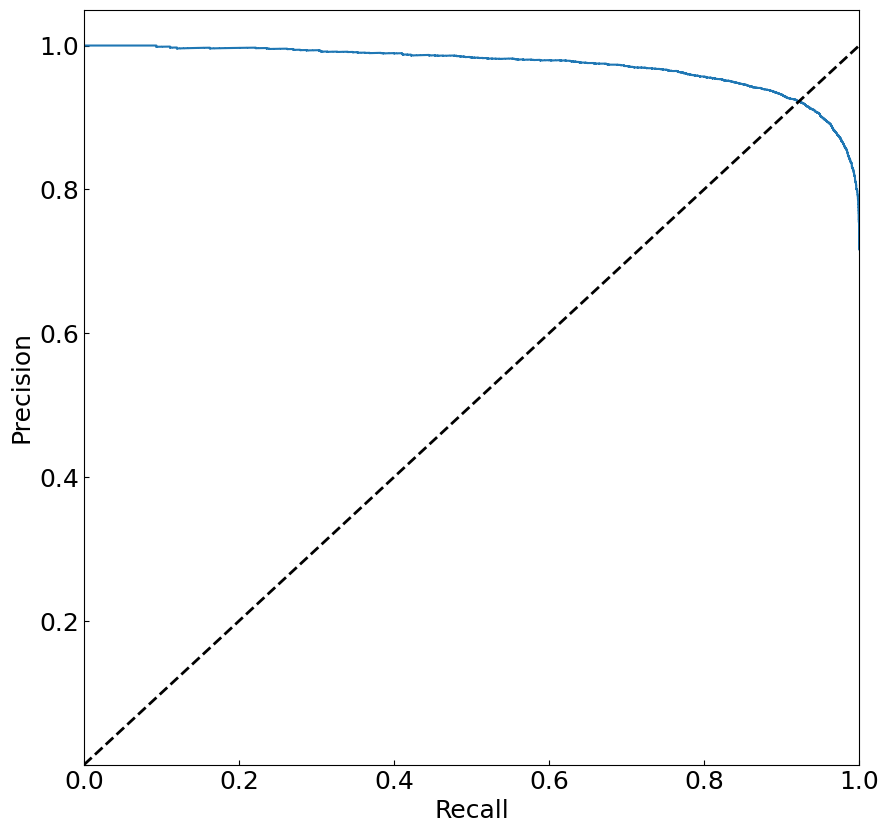

Saved: precision_recall_is_metal.png


In [14]:
# Evaluate model using test set
final_stage.PR(positive_class=1)

### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)

In [4]:
LGBMClassifier(importance_type='gain', learning_rate=0.06275986160315679,
               n_estimators=800, num_leaves=100, objective='binary',
               random_state=42)

LGBMClassifier(importance_type='gain', learning_rate=0.06275986160315679,
               n_estimators=800, num_leaves=100, objective='binary',
               random_state=42)

In [5]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.06275986160315679,
                        n_estimators=800,
                        num_leaves=100,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.06275986160315679,
               n_estimators=800, num_leaves=100, objective='binary',
               random_state=42)

In [6]:
# Predict
y_pred = lgbm.predict_proba(df_test[features])
y_pred_2 = lgbm.predict(df_test[features])
y_test = df_test[target]

# Generate table of results

# micro, macro, weighted
strategy = 'weighted'

print('1. The F-1 score of the model {}\n'.format(f1_score(y_test.ravel(), y_pred_2, average=strategy)))
print('2. The recall score of the model {}\n'.format(recall_score(y_test.ravel(), y_pred_2, average=strategy)))
print('3. Classification report \n {} \n'.format(classification_report(y_test.ravel(), y_pred_2, 
                                                                    target_names=['metal', 'non-metal'],
                                                                    digits=3)))
print('4. Classification report \n {} \n'.format(multilabel_confusion_matrix(y_test.ravel(), y_pred_2)))
print('5. Confusion matrix \n {} \n'.format(confusion_matrix(y_test.ravel(), y_pred_2)))
print('6. Accuracy score \n {} \n'.format(accuracy_score(y_test.ravel(), y_pred_2)))
print('7. Balanced accuracy score \n {} \n'.format(balanced_accuracy_score(y_test.ravel(), y_pred_2)))


1. The F-1 score of the model 0.9013271622215323

2. The recall score of the model 0.9025974025974026

3. Classification report 
               precision    recall  f1-score   support

       metal      0.907     0.813     0.857      3440
   non-metal      0.901     0.953     0.926      6108

    accuracy                          0.903      9548
   macro avg      0.904     0.883     0.892      9548
weighted avg      0.903     0.903     0.901      9548
 

4. Classification report 
 [[[5820  288]
  [ 642 2798]]

 [[2798  642]
  [ 288 5820]]] 

5. Confusion matrix 
 [[2798  642]
 [ 288 5820]] 

6. Accuracy score 
 0.9025974025974026 

7. Balanced accuracy score 
 0.8831104080047517 



In [7]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, average_precision_score

print(roc_auc_score(np.array(y_test.tolist()), y_pred[:, 1], average='macro'))


print(matthews_corrcoef(np.array(y_test.tolist()), y_pred_2))

0.9588641135910206
0.7865045585295241


In [8]:
y_test_2 = label_binarize(y_test, classes = list(range(2)))

print(average_precision_score(y_test_2, y_pred[:, 1], average="macro"))

0.9728421051175635


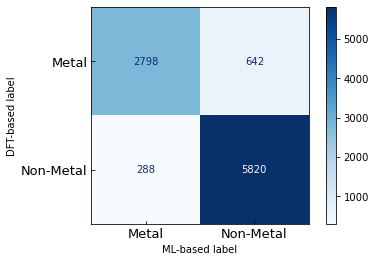

In [9]:
# np.set_printoptions(precision=2)
fontsize = 13
fontsize2 = 10

disp = plot_confusion_matrix(
                            lgbm, 
                            df_test[features], 
                            df_test[target],
                            display_labels=np.array(['Metal', 'Non-Metal'], dtype='<U10'),
                            cmap=plt.cm.Blues,
                            normalize=None
                            )

#disp.ax_.set_title('(d)', fontsize=fontsize, y=1.01) 

plt.tick_params(axis='both', which='major', labelsize=fontsize, direction='in')
plt.xlabel('ML-based label', size=fontsize2)
plt.ylabel('DFT-based label', size=fontsize2)

# #Final_figure
plt.savefig(path_to_save + 'confusion_matrix_v3.png', dpi = 500, bbox_inches="tight")

plt.show()

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

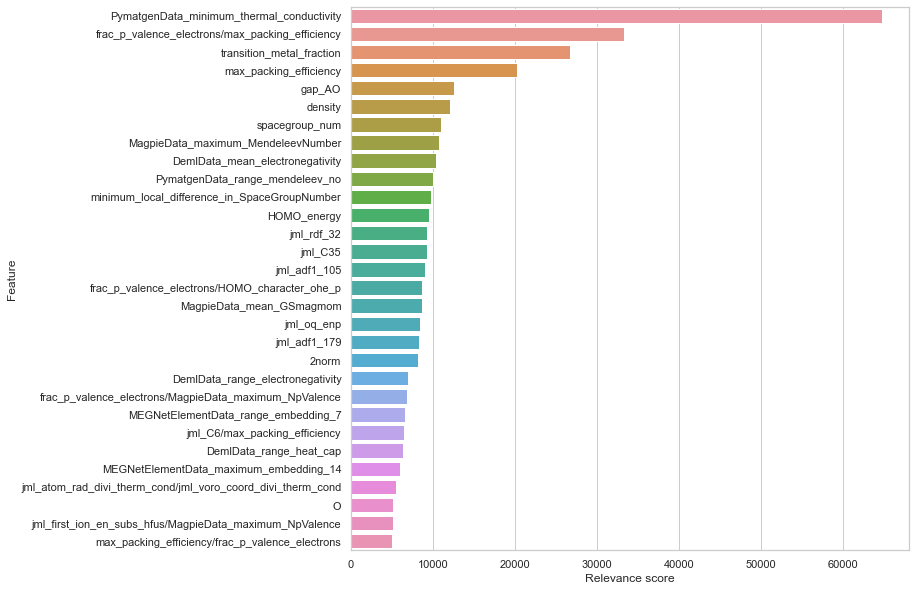

In [22]:
import seaborn as sns
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)

Get pretty graph

In [10]:
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


In [11]:
df_features = pd.read_csv('full_feature_list4.csv')
df_features.head()

feature_number                 features alternative_feature_name  \
0               0  minimum_oxidation_state                      NaN   
1               1  maximum_oxidation_state                      NaN   
2               2    range_oxidation_state                      NaN   
3               3  std_dev_oxidation_state                      NaN   
4               4        compound_possible                      NaN   

        featurizer       feature_type  
0  OxidationStates  composition - ion  
1  OxidationStates  composition - ion  
2  OxidationStates  composition - ion  
3  OxidationStates  composition - ion  
4      IonProperty  composition - ion

In [12]:
feature_score = feature_score.merge(df_features, left_on='feature', right_on='features', how='left')
feature_score

feature  relevance_score  \
0           PymatgenData_minimum_thermal_conductivity     64753.909823   
1     frac_p_valence_electrons/max_packing_efficiency     33213.559506   
2                           transition_metal_fraction     26692.214077   
3                              max_packing_efficiency     20270.804444   
4                                              gap_AO     12575.491399   
5                                             density     12063.125875   
6                                      spacegroup_num     11013.601370   
7                  MagpieData_maximum_MendeleevNumber     10738.756157   
8                     DemlData_mean_electronegativity     10415.119534   
9                     PymatgenData_range_mendeleev_no      9990.879999   
10       minimum_local_difference_in_SpaceGroupNumber      9784.854919   
11                                        HOMO_energy      9465.010418   
12                                         jml_rdf_32      9274.010991   
13                                            jml_C35      9253.902540   
14                                       jml_adf1_105      9047.163438   
15      frac_p_valence_electrons/HOMO_character_ohe_p      8713.175350   
16                           MagpieData_mean_GSmagmom      8624.716430   
17                                         jml_oq_enp      8385.063990   
18                                       jml_adf1_179      8308.004750   
19                                              2norm      8172.158199   
20                   DemlData_range_electronegativity      6909.442570   
21  frac_p_valence_electrons/MagpieData_maximum_Np...      6858.972315   
22                MEGNetElementData_range_embedding_7      6552.788491   
23                      jml_C6/max_packing_efficiency      6517.932482   
24                            DemlData_range_heat_cap      6336.251056   
25             MEGNetElementData_maximum_embedding_14      5951.419393   
26  jml_atom_rad_divi_therm_cond/jml_voro_coord_di...      5438.159919   
27                                                  O      5152.977214   
28  jml_first_ion_en_subs_hfus/MagpieData_maximum_...      5129.517625   
29    max_packing_efficiency/frac_p_valence_electrons      5037.939379   
30                                           jml_C6/O      4622.719581   
31                    frac_p_valence_electrons/jml_C6      4245.560373   
32                                          jml_nn_16      3999.563593   
33                  jml_first_ion_en_subs_hfus/jml_C6      3975.403442   
34  frac_p_valence_electrons/jml_mol_vol_divi_ther...      3894.276623   
35                                                 Cu      3594.121596   
36  jml_mol_vol_divi_therm_cond/frac_p_valence_ele...      3323.824327   
37   PymatgenData_minimum_thermal_conductivity/jml_C6      3299.452711   
38    max_packing_efficiency/crystal_system_ohe_cubic      2426.085305   
39  PymatgenData_maximum_coefficient_of_linear_the...      1300.868518   
40                                        Yb_fraction      1114.664048   
41                                HOMO_element_ohe_Ti       808.127064   

    feature_number                                           features  \
0              301          PymatgenData_minimum_thermal_conductivity   
1             4124    frac_p_valence_electrons/max_packing_efficiency   
2              116                          transition_metal_fraction   
3             2170                             max_packing_efficiency   
4              605                                             gap_AO   
5             2164                                            density   
6             2288                                     spacegroup_num   
7              131                 MagpieData_maximum_MendeleevNumber   
8              379                    DemlData_mean_electronegativity   
9              288                    PymatgenData_range_mendeleev_no   
10            2283       minimum_local_difference_in_SpaceGr

In [14]:
# joblib.dump(feature_score, path_to_save + 'final_42_features_for_is_metal.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/is_metal_results/final_42_features_for_is_metal.pkl']

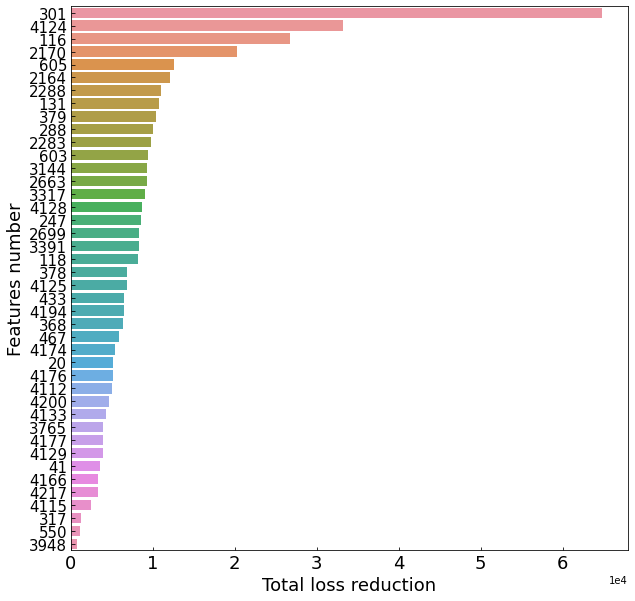

In [19]:
import seaborn as sns

plt.figure(figsize=(8.7, 8.3))

feature_score['feature_number'] = feature_score['feature_number'].astype("string")

fontsize = 18
labelsize = 18
    
sns.barplot(x="relevance_score", y="feature_number", data=feature_score)
# plt.title('(c)', fontsize=fontsize+6, y=1.01) 
#plt.grid(which = 'major')
plt.tight_layout()
plt.xlabel('Total loss reduction', fontsize=fontsize)
plt.ylabel('Features number', fontsize=fontsize)
#plt.xlim([0,1])
#axis : {'x', 'y', 'both'}
plt.tick_params(axis='y', which='major', labelsize=labelsize-3, direction='in')
plt.tick_params(axis='x', which='major', labelsize=fontsize, direction='in')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0) )

plt.savefig(path_to_save + 'class_feature_selected.png', dpi = 500, bbox_inches="tight")

plt.show()

In [23]:
feature_score.to_csv(path_to_save + 'final_42_features_for_is_metal.csv')

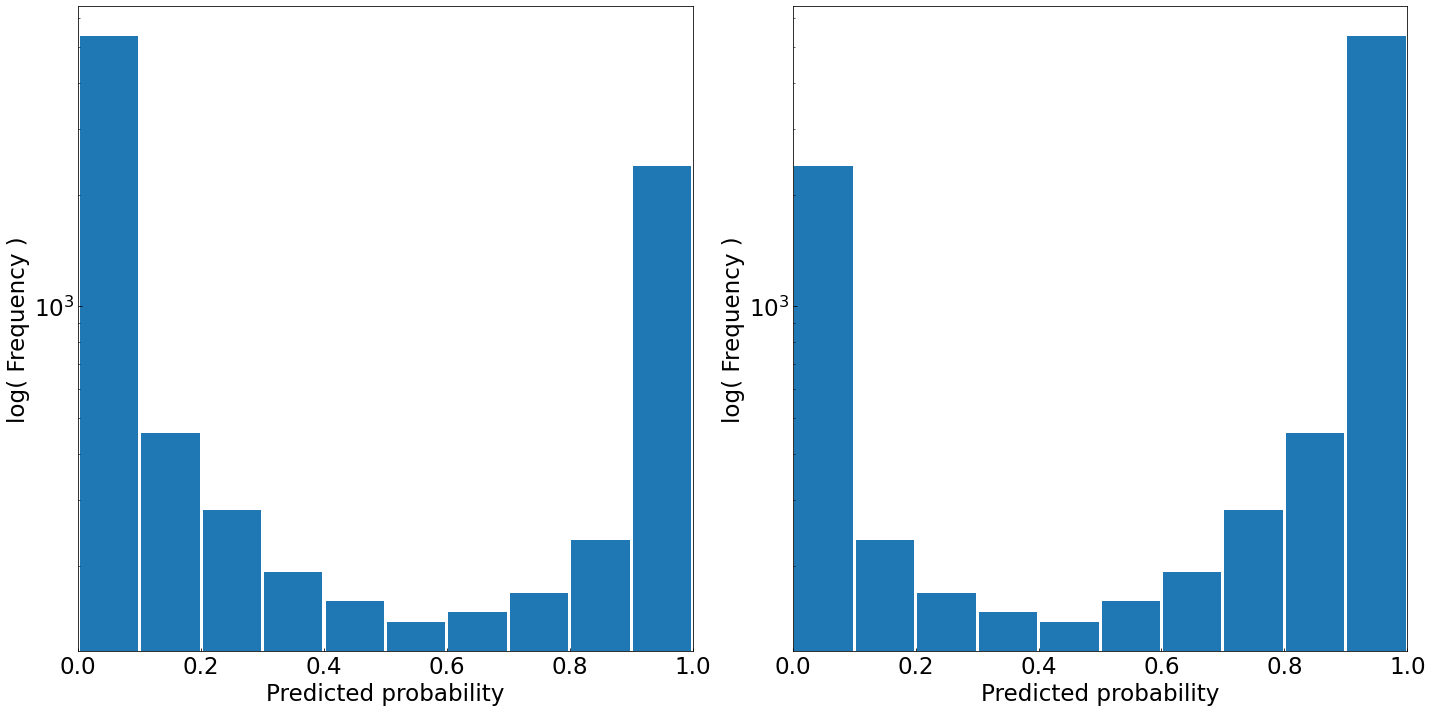

In [24]:
# histogram of predicted probabilities for test data
plt.figure(figsize=(20, 10))

nclasses = 2
target_class = ['Metal', 'Non-metal']

fontsize = 18 + 5

for i in range(nclasses):
    plt.subplot(1, 2, i+1)
    plt.hist(y_pred[:, i], bins=10, histtype='bar', rwidth=0.95)
    plt.xlim(0,1)
    #plt.ylim(10**0.5, 6*10**3)
    plt.yscale('log')
    #plt.title('{}'.format(target_class[i]), fontsize=fontsize)
    plt.tick_params(axis='x', which='major', direction='in', labelsize=fontsize)
    plt.tick_params(axis='y', which='both', direction='in', labelsize=fontsize)
    plt.xlabel('Predicted probability', fontsize=fontsize)
    plt.ylabel('log( Frequency )', fontsize=fontsize)
    
plt.tight_layout()

#final_figure
plt.savefig(path_to_save + 'probability_distribution.png', dpi = 500, bbox_inches="tight")

plt.show()

### SHAP

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import shap 

from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score, multilabel_confusion_matrix, roc_curve, roc_auc_score, \
                            auc, f1_score, classification_report, recall_score, precision_recall_curve, \
                            balanced_accuracy_score, confusion_matrix, accuracy_score, average_precision_score, \
                            hamming_loss, matthews_corrcoef

from lightgbm.sklearn import LGBMClassifier


In [2]:
# Target
target = 'is_metal'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/6. ricci_boltztrap_mp_tabular (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'
path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'classification'

scaled = False

In [3]:
df_train = joblib.load(path_to_train_data)
df_test = joblib.load(path_to_test_data)

features = joblib.load(path_to_features)
len(features)

42

In [4]:
lgbm  = LGBMClassifier(
                        importance_type='gain',
                        objective='binary',
                        learning_rate=0.06275986160315679,
                        n_estimators=800,
                        num_leaves=100,
                        random_state=42
                        )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMClassifier(importance_type='gain', learning_rate=0.06275986160315679,
               n_estimators=800, num_leaves=100, objective='binary',
               random_state=42)

In [5]:
# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

In [6]:
# df_final_features = pd.DataFrame({'feature_before_rfe': features})
# print(len(df_final_features))

df_final_features = feature_score

df_final_features.head()

feature  relevance_score
0        PymatgenData_minimum_thermal_conductivity     64753.909823
1  frac_p_valence_electrons/max_packing_efficiency     33213.559506
2                        transition_metal_fraction     26692.214077
3                           max_packing_efficiency     20270.804444
4                                           gap_AO     12575.491399

In [7]:
df_all = pd.read_csv('full_feature_list4.csv')
print(len(df_all))
df_all.head()

4219


feature_number                 features alternative_feature_name  \
0               0  minimum_oxidation_state                      NaN   
1               1  maximum_oxidation_state                      NaN   
2               2    range_oxidation_state                      NaN   
3               3  std_dev_oxidation_state                      NaN   
4               4        compound_possible                      NaN   

        featurizer       feature_type  
0  OxidationStates  composition - ion  
1  OxidationStates  composition - ion  
2  OxidationStates  composition - ion  
3  OxidationStates  composition - ion  
4      IonProperty  composition - ion

In [8]:
df = df_final_features.merge(df_all, left_on='feature', right_on='features')
print(len(df))

df.head()

42


feature  relevance_score  \
0        PymatgenData_minimum_thermal_conductivity     64753.909823   
1  frac_p_valence_electrons/max_packing_efficiency     33213.559506   
2                        transition_metal_fraction     26692.214077   
3                           max_packing_efficiency     20270.804444   
4                                           gap_AO     12575.491399   

   feature_number                                         features  \
0             301        PymatgenData_minimum_thermal_conductivity   
1            4124  frac_p_valence_electrons/max_packing_efficiency   
2             116                        transition_metal_fraction   
3            2170                           max_packing_efficiency   
4             605                                           gap_AO   

  alternative_feature_name                  featurizer           feature_type  
0                      NaN  ElementProperty - Matminer           composition   
1                      NaN                 Engineered                is metal  
2                      NaN              TMetalFraction  composition - element  
3                      NaN    MaximumPackingEfficiency     structure - order   
4                      NaN              AtomicOrbitals  composition - orbital

In [9]:
X = df_train[features]
X = X[df['feature'].to_list()]
X

PymatgenData_minimum_thermal_conductivity  \
mp-763641                                    0.02658   
mp-25591                                     0.02658   
mp-568761                                    3.00000   
mp-641065                                    0.02658   
mp-607223                                    6.00000   
...                                              ...   
mp-23712                                     0.18050   
mp-540484                                    0.02658   
mp-626557                                    0.02658   
mp-9127                                      0.02658   
mp-647452                                    0.02658   

           frac_p_valence_electrons/max_packing_efficiency  \
mp-763641                                         2.206523   
mp-25591                                          0.880231   
mp-568761                                         0.331937   
mp-641065                                         0.816593   
mp-607223                                         0.039720   
...                                                    ...   
mp-23712                                          0.000000   
mp-540484                                         3.032770   
mp-626557                                         2.339493   
mp-9127                                           1.428213   
mp-647452                                         0.876313   

           transition_metal_fraction  max_packing_efficiency    gap_AO  \
mp-763641                   0.142857                0.220477  0.000000   
mp-25591                    0.200000                0.400964  0.127617   
mp-568761                   0.500000                0.446314  0.000000   
mp-641065                   0.350000                0.402609  0.000000   
mp-607223                   0.000000                0.740480  0.000000   
...                              ...                     ...       ...   
mp-23712                    0.000000                0.501215  0.058044   
mp-540484                   0.090909                0.186848  0.071841   
mp-626557                   0.250000                0.213722  0.104910   
mp-9127                     0.000000                0.308901  0.000000   
mp-647452                   0.350000                0.445325  0.000000   

             density  spacegroup_num  MagpieData_maximum_MendeleevNumber  \
mp-763641   2.896858              29                                87.0   
mp-25591    7.242194              62                                87.0   
mp-568761   7.252714              62                                90.0   
mp-641065   6.229790             204                                87.0   
mp-607223  14.263809             221                                75.0   
...              ...             ...                                 ...   
mp-23712    1.766552              62                                92.0   
mp-540484   2.902818               4                                87.0   
mp-626557   3.065601               8                                92.0   
mp-9127     5.357452             162                                87.0   
mp-647452   4.416513             229                                87.0   

           DemlData_mean_electronegativity  PymatgenData_range_mendeleev_no  \
mp-763641                         2.638571                             89.0   
mp-25591                          2.674000                             71.0   
mp-568761                         2.015000                             21.0   
mp-641065                         2.720500                             78.0   
mp-607223                         0.000000                             35.0   
...                                    ...                              ...   
mp-23712                          1.903333                             30.0   
mp-540484                         2.817273                             89.0   
mp-626557                         2.758333                             52.0   
m

In [10]:
frame = df['feature_number'].to_list()
f_number = [str(i) for i in frame]

X.columns = f_number
X

301      4124       116      2170       605       2164  2288  \
mp-763641  0.02658  2.206523  0.142857  0.220477  0.000000   2.896858    29   
mp-25591   0.02658  0.880231  0.200000  0.400964  0.127617   7.242194    62   
mp-568761  3.00000  0.331937  0.500000  0.446314  0.000000   7.252714    62   
mp-641065  0.02658  0.816593  0.350000  0.402609  0.000000   6.229790   204   
mp-607223  6.00000  0.039720  0.000000  0.740480  0.000000  14.263809   221   
...            ...       ...       ...       ...       ...        ...   ...   
mp-23712   0.18050  0.000000  0.000000  0.501215  0.058044   1.766552    62   
mp-540484  0.02658  3.032770  0.090909  0.186848  0.071841   2.902818     4   
mp-626557  0.02658  2.339493  0.250000  0.213722  0.104910   3.065601     8   
mp-9127    0.02658  1.428213  0.000000  0.308901  0.000000   5.357452   162   
mp-647452  0.02658  0.876313  0.350000  0.445325  0.000000   4.416513   229   

            131       379   288  ...      3765      4177      4129    41  \
mp-763641  87.0  2.638571  89.0  ...  0.000000  0.146596  0.002978  0.00   
mp-25591   87.0  2.674000  71.0  ...  0.000000  0.125518  0.001618  0.00   
mp-568761  90.0  2.015000  21.0  ...  0.000000  0.160424  0.043294  0.00   
mp-641065  87.0  2.720500  78.0  ...  0.000000  0.100277  0.002007  0.15   
mp-607223  75.0  0.000000  35.0  ...  0.000000  0.000000  0.000000  0.00   
...         ...       ...   ...  ...       ...       ...       ...   ...   
mp-23712   92.0  1.903333  30.0  ...  0.000000  0.801283  0.000000  0.00   
mp-540484  87.0  2.817273  89.0  ...  1.090909  0.152052  0.003121  0.00   
mp-626557  92.0  2.758333  52.0  ...  0.166667  0.321889  0.002092  0.00   
mp-9127    87.0  2.847778  87.0  ...  0.000000  0.570731  0.002018  0.00   
mp-647452  87.0  2.707000  85.0  ...  0.000000  0.139019  0.002388  0.15   

                 4166      4217      4115  317  550  3948  
mp-763641  335.798048  0.000453  0.000000  0.0  0.0     0  
mp-25591   618.050340  0.000377  0.000000  0.0  0.0     0  
mp-568761   23.098108  0.059055  0.000000  0.0  0.0     0  
mp-641065  498.266048  0.000310  0.402609  0.0  0.0     0  
mp-607223    0.000000  0.000000  0.740480  0.0  0.0     0  
...               ...       ...       ...  ...  ...   ...  
mp-23712     0.000000  0.013674  0.000000  0.0  0.0     0  
mp-540484  320.442696  0.000442  0.000000  0.0  0.0     0  
mp-626557  477.916655  0.000757  0.000000  0.0  0.0     0  
mp-9127    495.644872  0.001675  0.000000  0.0  0.0     0  
mp-647452  418.811835  0.000436  0.445325  0.0  0.0     0  

[38189 rows x 42 columns]

In [11]:
explainer = shap.Explainer(lgbm)

shap_values = explainer(df_train[features])
#shap_values = explainer(X)

In [6]:
print(shap_values.shape)
print(shap_values[:, :, 0].shape)

(38189, 42, 2)
(38189, 42)


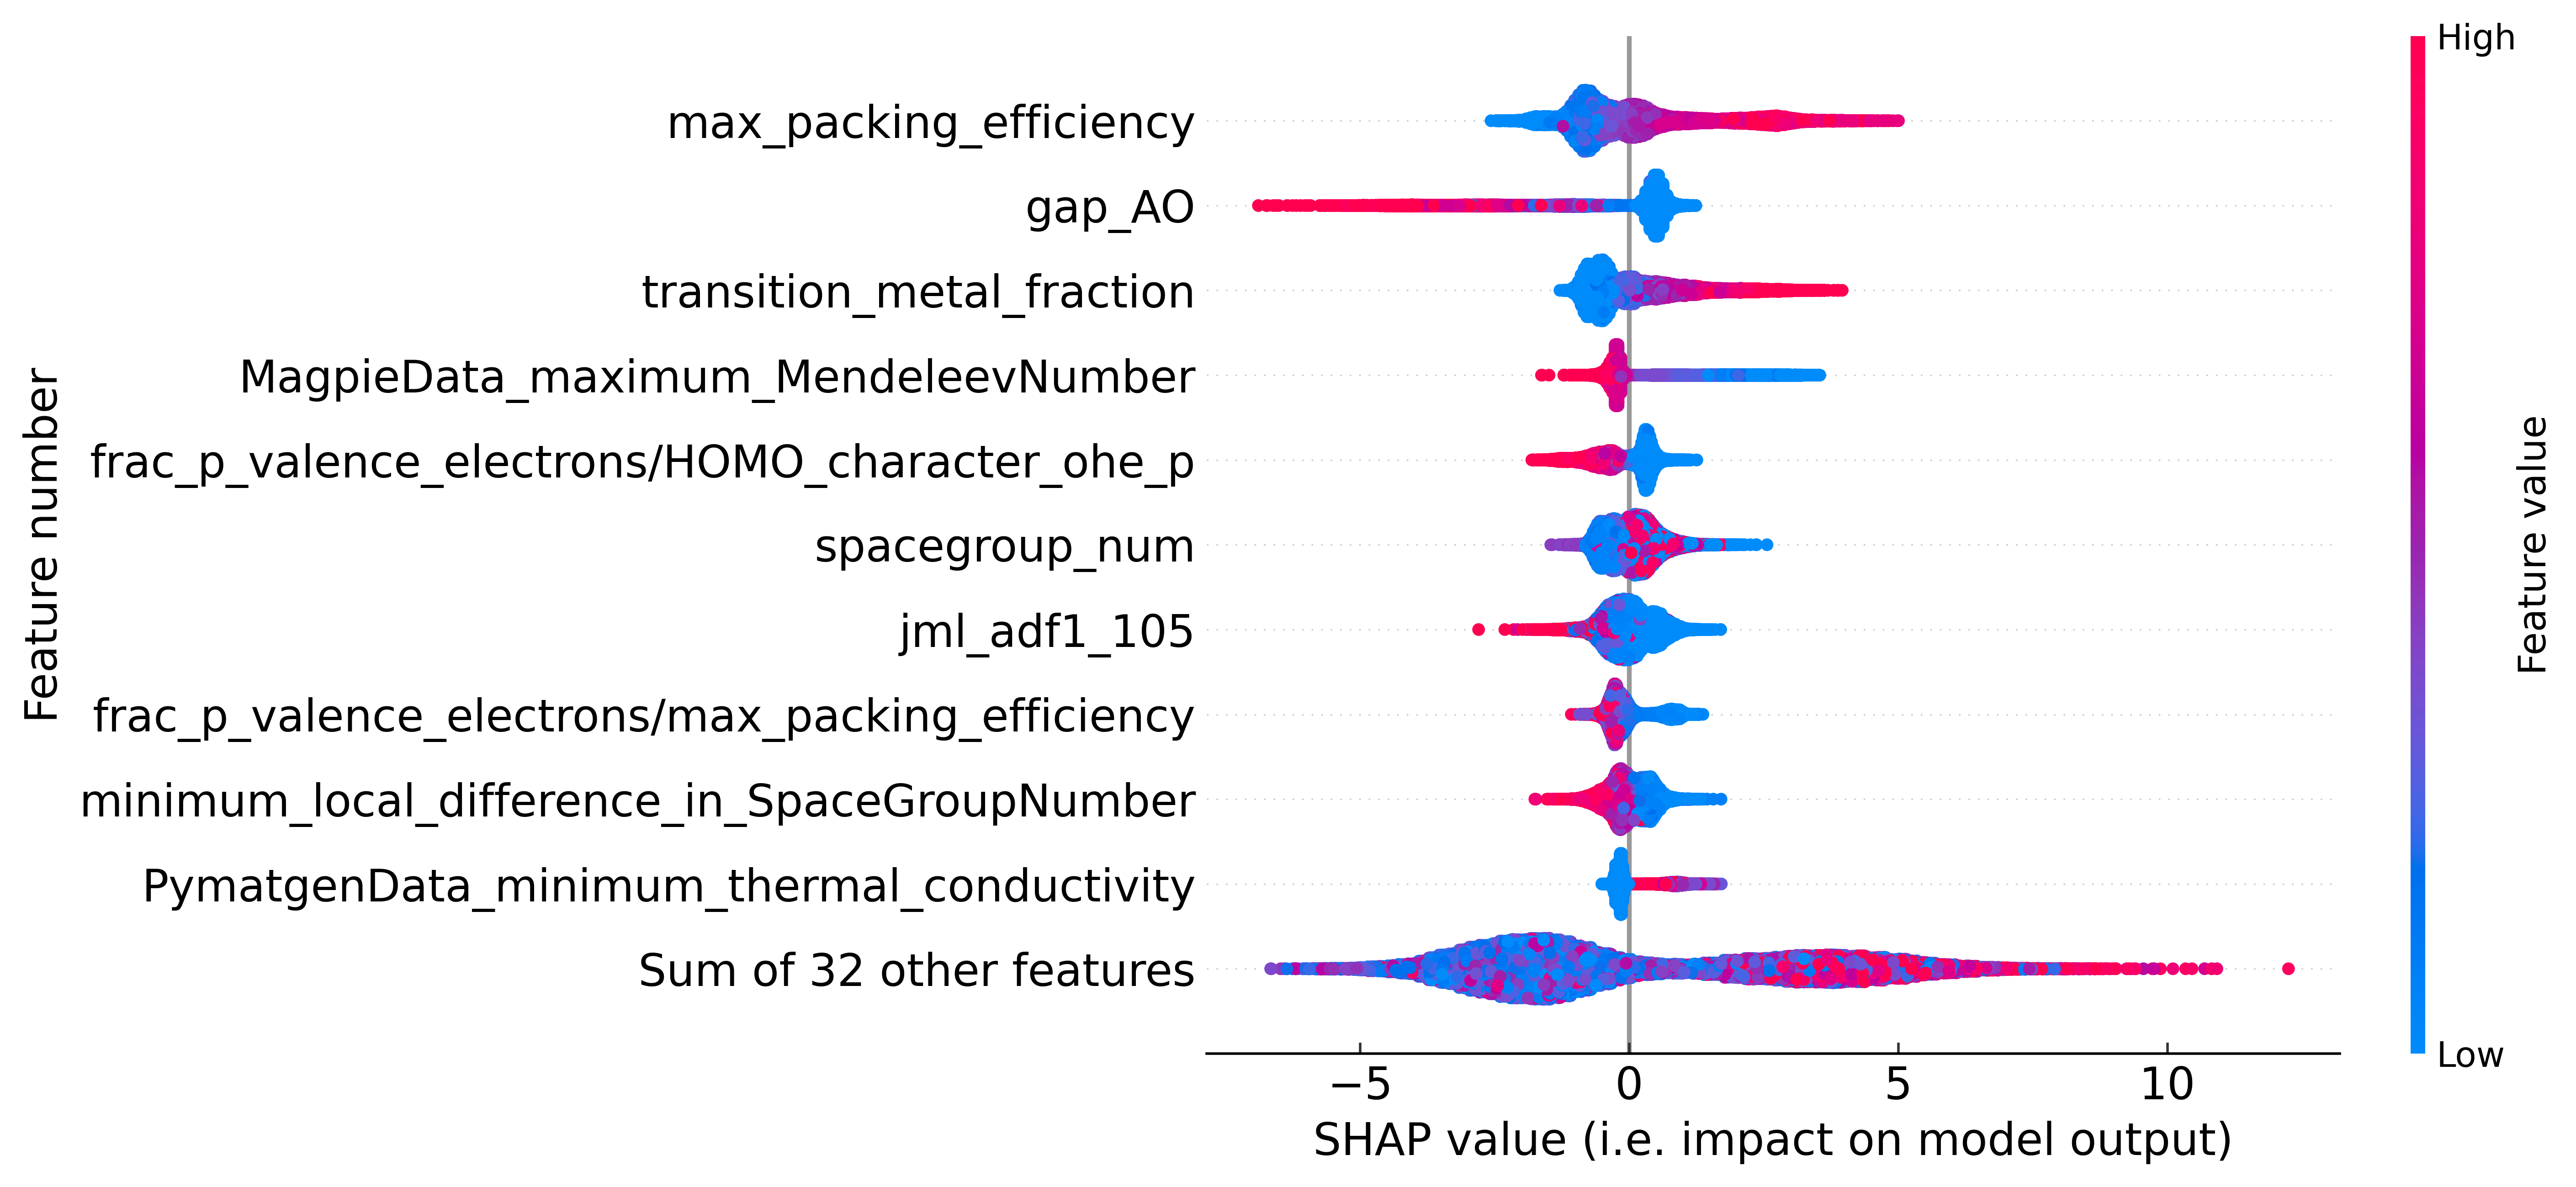

In [7]:
figure(figsize=(10, 10), dpi=500)

shap_data = shap_values[:, :, 0]

shap.plots.beeswarm(shap_data, max_display=11, show=False)

fontsize = 14

# plt.axhline(y=0, color='k')
# plt.axvline(x=0, color='k')

plt.ylabel('Feature number', fontsize = fontsize, color='k')
plt.xlabel('SHAP value (i.e. impact on model output)', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in')
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

#plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')
plt.show()

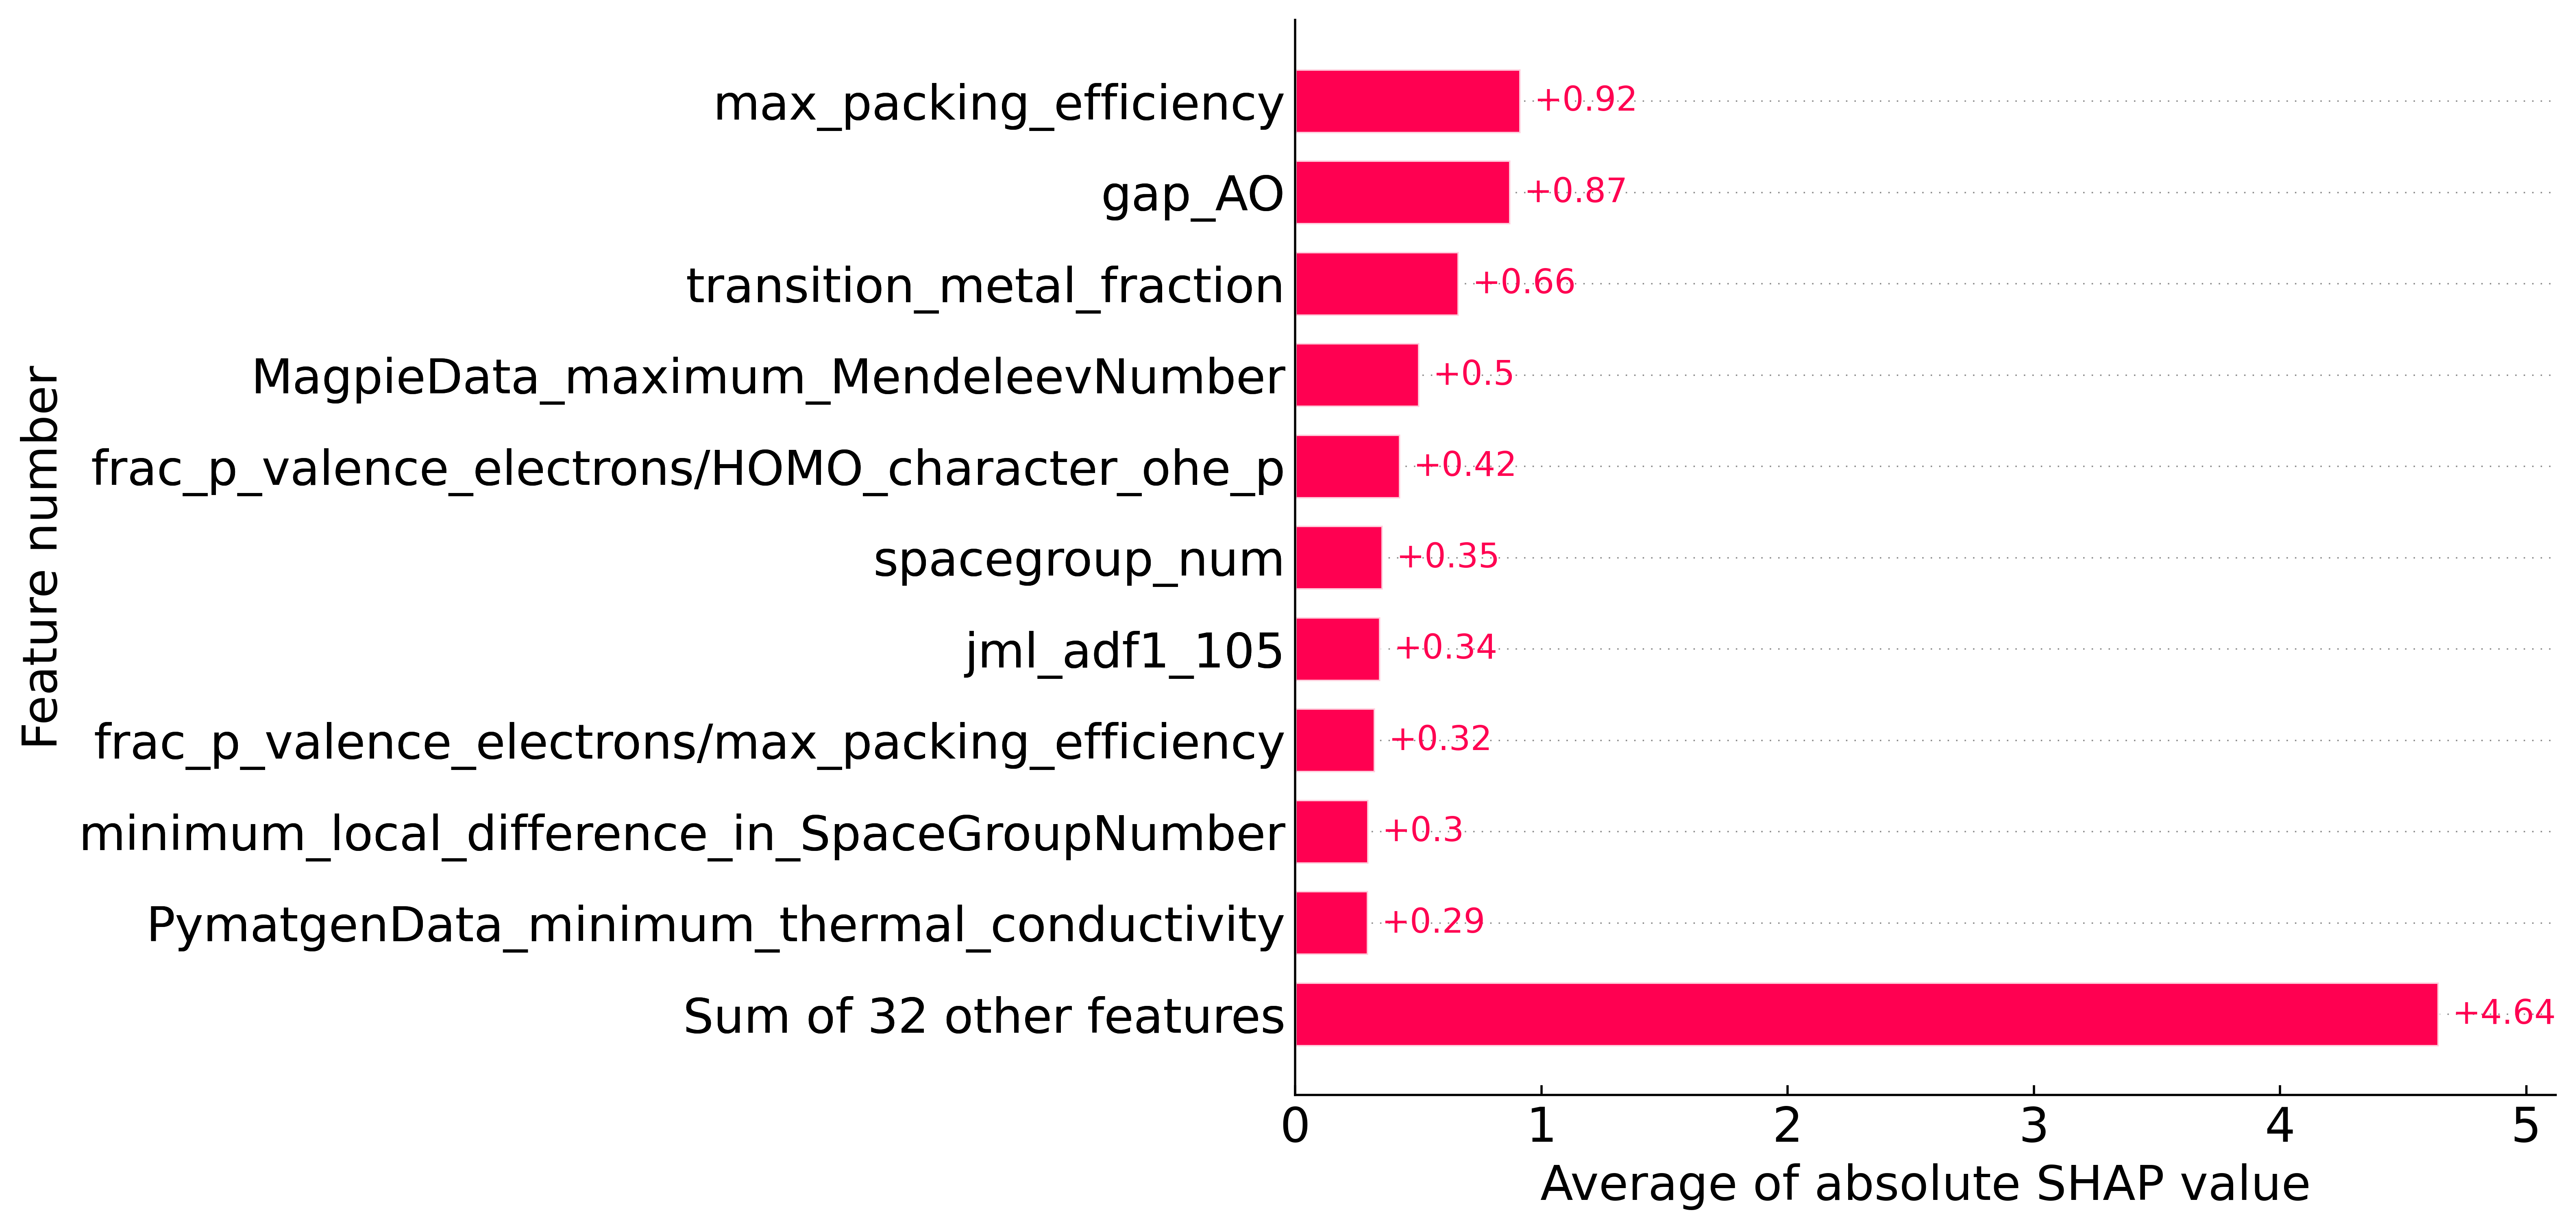

In [7]:
figure(figsize=(10, 10), dpi=500)

shap_data = shap_values[:, :, 0]

shap.plots.bar(shap_data, max_display=11, show=False)

fontsize = 17


plt.ylabel('Feature number', fontsize = fontsize, color='k')
plt.xlabel('Average of absolute SHAP value', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in')
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')

#plt.savefig(path_to_save + 'shap_waterfall.png', dpi=600, bbox_inches='tight')

plt.show()

<Figure size 5000x5000 with 0 Axes>

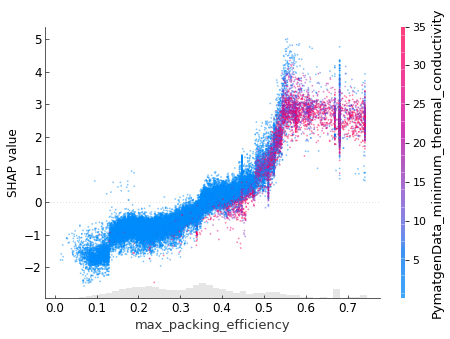

In [12]:
figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"max_packing_efficiency", 0], 
                    color=shap_values[:, "PymatgenData_minimum_thermal_conductivity", 0], 
                    dot_size=3,
                    #xmin=0, 
                    #xmax=60,
                    alpha=0.5,
                    x_jitter=1,
                    show=False,
                    
                    )

fontsize = 12


plt.ylabel('SHAP value', fontsize = fontsize, color='k')
# plt.xlabel('Feature number 2170', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')


#plt.savefig(path_to_save + 'shap_scatter.png', dpi=600, bbox_inches='tight')

plt.show()

<Figure size 5000x5000 with 0 Axes>

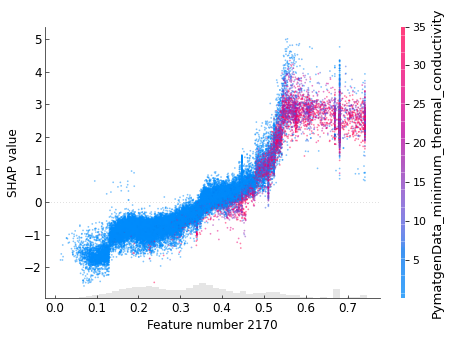

In [14]:
figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"max_packing_efficiency", 0], 
                    color=shap_values[:, "PymatgenData_minimum_thermal_conductivity", 0], 
                    dot_size=3,
                    #xmin=0, 
                    #xmax=60,
                    alpha=0.5,
                    x_jitter=1,
                    show=False,
                    
                    )

fontsize = 12


plt.ylabel('SHAP value', fontsize = fontsize, color='k')
plt.xlabel('Feature number 2170', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')


plt.savefig(path_to_save + 'shap_scatter.png', dpi=600, bbox_inches='tight')

plt.show()

<Figure size 5000x5000 with 0 Axes>

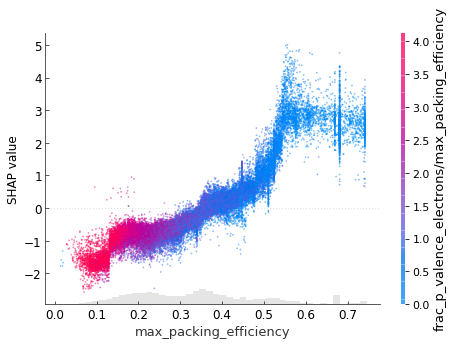

In [28]:
figure(figsize=(10, 10), dpi=500)

shap.plots.scatter(
                    shap_values[:,"max_packing_efficiency", 0], 
                    color=shap_values[:, :, 0], 
                    dot_size=3,
                    #xmin=0, 
                    #xmax=60,
                    alpha=0.5,
                    show=False
                    )

fontsize = 12


plt.ylabel('SHAP value', fontsize = fontsize, color='k')
#plt.xlabel('Feature number 2165', fontsize = fontsize, color='k')
plt.tick_params(axis = 'both', which = 'major', labelsize = fontsize, direction = 'in', )
plt.yticks(fontsize = fontsize, color='k')
plt.xticks(fontsize = fontsize, color='k')


#plt.savefig(path_to_save + 'shap_scatter.png', dpi=600, bbox_inches='tight')

plt.show()